# Setup

In [1]:
# Libarries loading

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr, f_oneway

# Settings
import warnings
warnings.filterwarnings('ignore')

# Mathematical operations
import math

# Preprocessing
from sklearn.preprocessing import (PowerTransformer, QuantileTransformer,
                                   RobustScaler, StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder)

# Modelling
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
DATASET_PATH = 'StudentPerformanceFactors.csv'
DATASET_TARGET = 'Exam_Score'

In [3]:
# Data loading
df = pd.read_csv(DATASET_PATH)

df

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

# Exploratory Data Analysis

## Initial inspection

In [4]:
# First 5 rows
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [5]:
# Last 5 rows
df.tail()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
6602                    No              High School               Near   
6603                    No              High School               Near   
6604                    No             Postgraduate               Near   
6605                    No              High School                Far   
6606                    No             Postgraduate               Near   

      Gender  Exam_Score  
6602  Female          68  
6603  Female          69  
6604  Female          68  
6605  Female          68  
6606    Male          64

In [6]:
# Datasets info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Data quality inspection

In [7]:
# Find duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# Missing data
pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique(),
    'Unique %': (df.nunique() / len(df) * 100).round(2),
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

Data Type  Non-Null Count  Null Count  Null %  \
Hours_Studied                  int64            6607           0    0.00   
Attendance                     int64            6607           0    0.00   
Parental_Involvement          object            6607           0    0.00   
Access_to_Resources           object            6607           0    0.00   
Extracurricular_Activities    object            6607           0    0.00   
Sleep_Hours                    int64            6607           0    0.00   
Previous_Scores                int64            6607           0    0.00   
Motivation_Level              object            6607           0    0.00   
Internet_Access               object            6607           0    0.00   
Tutoring_Sessions              int64            6607           0    0.00   
Family_Income                 object            6607           0    0.00   
Teacher_Quality               object            6529          78    1.18   
School_Type                   object            6607           0    0.00   
Peer_Influence                object            6607           0    0.00   
Physical_Activity              int64            6607           0    0.00   
Learning_Disabilities         object            6607           0    0.00   
Parental_Education_Level      object            6517          90    1.36   
Distance_from_Home            object            6540          67    1.01   
Gender                        object            6607           0    0.00   
Exam_Score                     int64            6607           0    0.00   

                            Unique Values  Unique %  Missing_Count  \
Hours_Studied                          41      0.62              0   
Attendance                             41      0.62              0   
Parental_Involvement                    3      0.05              0   
Access_to_Resources                     3      0.05              0   
Extracurricular_Activities              2      0.03              0   
Sleep_Hours                             7      0.11              0   
Previous_Scores                        51      0.77              0   
Motivation_Level                        3      0.05              0   
Internet_Access                         2      0.03              0   
Tutoring_Sessions                       9      0.14              0   
Family_Income                           3      0.05              0   
Teacher_Quality                         3      0.05             78   
School_Type                             2      0.03              0   
Peer_Influence                          3      0.05              0   
Physical_Activity                       7      0.11              0   
Learning_Disabilities                   2      0.03              0   
Parental_Education_Level                3      0.05             90   
Distance_from_Home                      3      0.05             67   
Gender                                  2      0.03              0   
Exam_Score                             45      0.68              0   

                            Missing_Percentage  
Hours_Studied                             0.00  
Attendance                                0.00  
Parental_Involvement                      0.00  
Access_to_Resources                       0.00  
Extracurricular_Activities                0.00  
Sleep_Hours                               0.00  
Previous_Scores                           0.00  
Motivation_Level                          0.00  
Internet_Access                           0.00  
Tutoring_Sessions                         0.00  
Family_Income                             0.00  
Teacher_Quality                           1.18  
School_Type                               0.00  
Peer_Influence                            0.00  
Physical_Activity                         0.00  
Learning_Disabilities                     0.00  
Parental_Education_Level                  1.36  
Distance_from_Home                        1.01  
Gender                      

## Univariate analysis

In [9]:
categorical_vars = []
continuous_vars = []
binary_vars = []
ordinal_vars = []
dtype = []

for col in df.columns:
    unique_count = df[col].nunique()
    cols_type = None
    unique = None

    # Categorical variables
    if df[col].dtype == 'object':
        categorical_vars.append(col)
        unique = df[col].unique().tolist()

        # Binary variables
        if unique_count == 2:
            binary_vars.append(col)
            cols_type = 'Binary'

        # Ordinal and nominal variables
        elif unique_count <= 3 and df[col].dtype == 'object':
            ordinal_vars.append(col)
            cols_type = 'Ordinal'
    # Continous variables
    else:
        continuous_vars.append(col)
        cols_type = 'Continuous'

    dtype.append({
        "Name": col,
        "Type": cols_type,
        "Unique value": unique
    })

df_cols_dtype = pd.DataFrame(dtype)

df_cols_dtype

Name        Type  \
0                Hours_Studied  Continuous   
1                   Attendance  Continuous   
2         Parental_Involvement     Ordinal   
3          Access_to_Resources     Ordinal   
4   Extracurricular_Activities      Binary   
5                  Sleep_Hours  Continuous   
6              Previous_Scores  Continuous   
7             Motivation_Level     Ordinal   
8              Internet_Access      Binary   
9            Tutoring_Sessions  Continuous   
10               Family_Income     Ordinal   
11             Teacher_Quality     Ordinal   
12                 School_Type      Binary   
13              Peer_Influence     Ordinal   
14           Physical_Activity  Continuous   
15       Learning_Disabilities      Binary   
16    Parental_Education_Level     Ordinal   
17          Distance_from_Home     Ordinal   
18                      Gender      Binary   
19                  Exam_Score  Continuous   

                                 Unique value  
0                                        None  
1                                        None  
2                         [Low, Medium, High]  
3                         [High, Medium, Low]  
4                                   [No, Yes]  
5                                        None  
6                                        None  
7                         [Low, Medium, High]  
8                                   [Yes, No]  
9                                        None  
10                        [Low, Medium, High]  
11                   [Medium, High, Low, nan]  
12                          [Public, Private]  
13              [Positive, Negative, Neutral]  
14                                       None  
15                                  [No, Yes]  
16  [High School, College, Postgraduate, nan]  
17                 [Near, Moderate, Far, nan]  
18                             [Male, Female]  
19                                       None

### Categorical variables

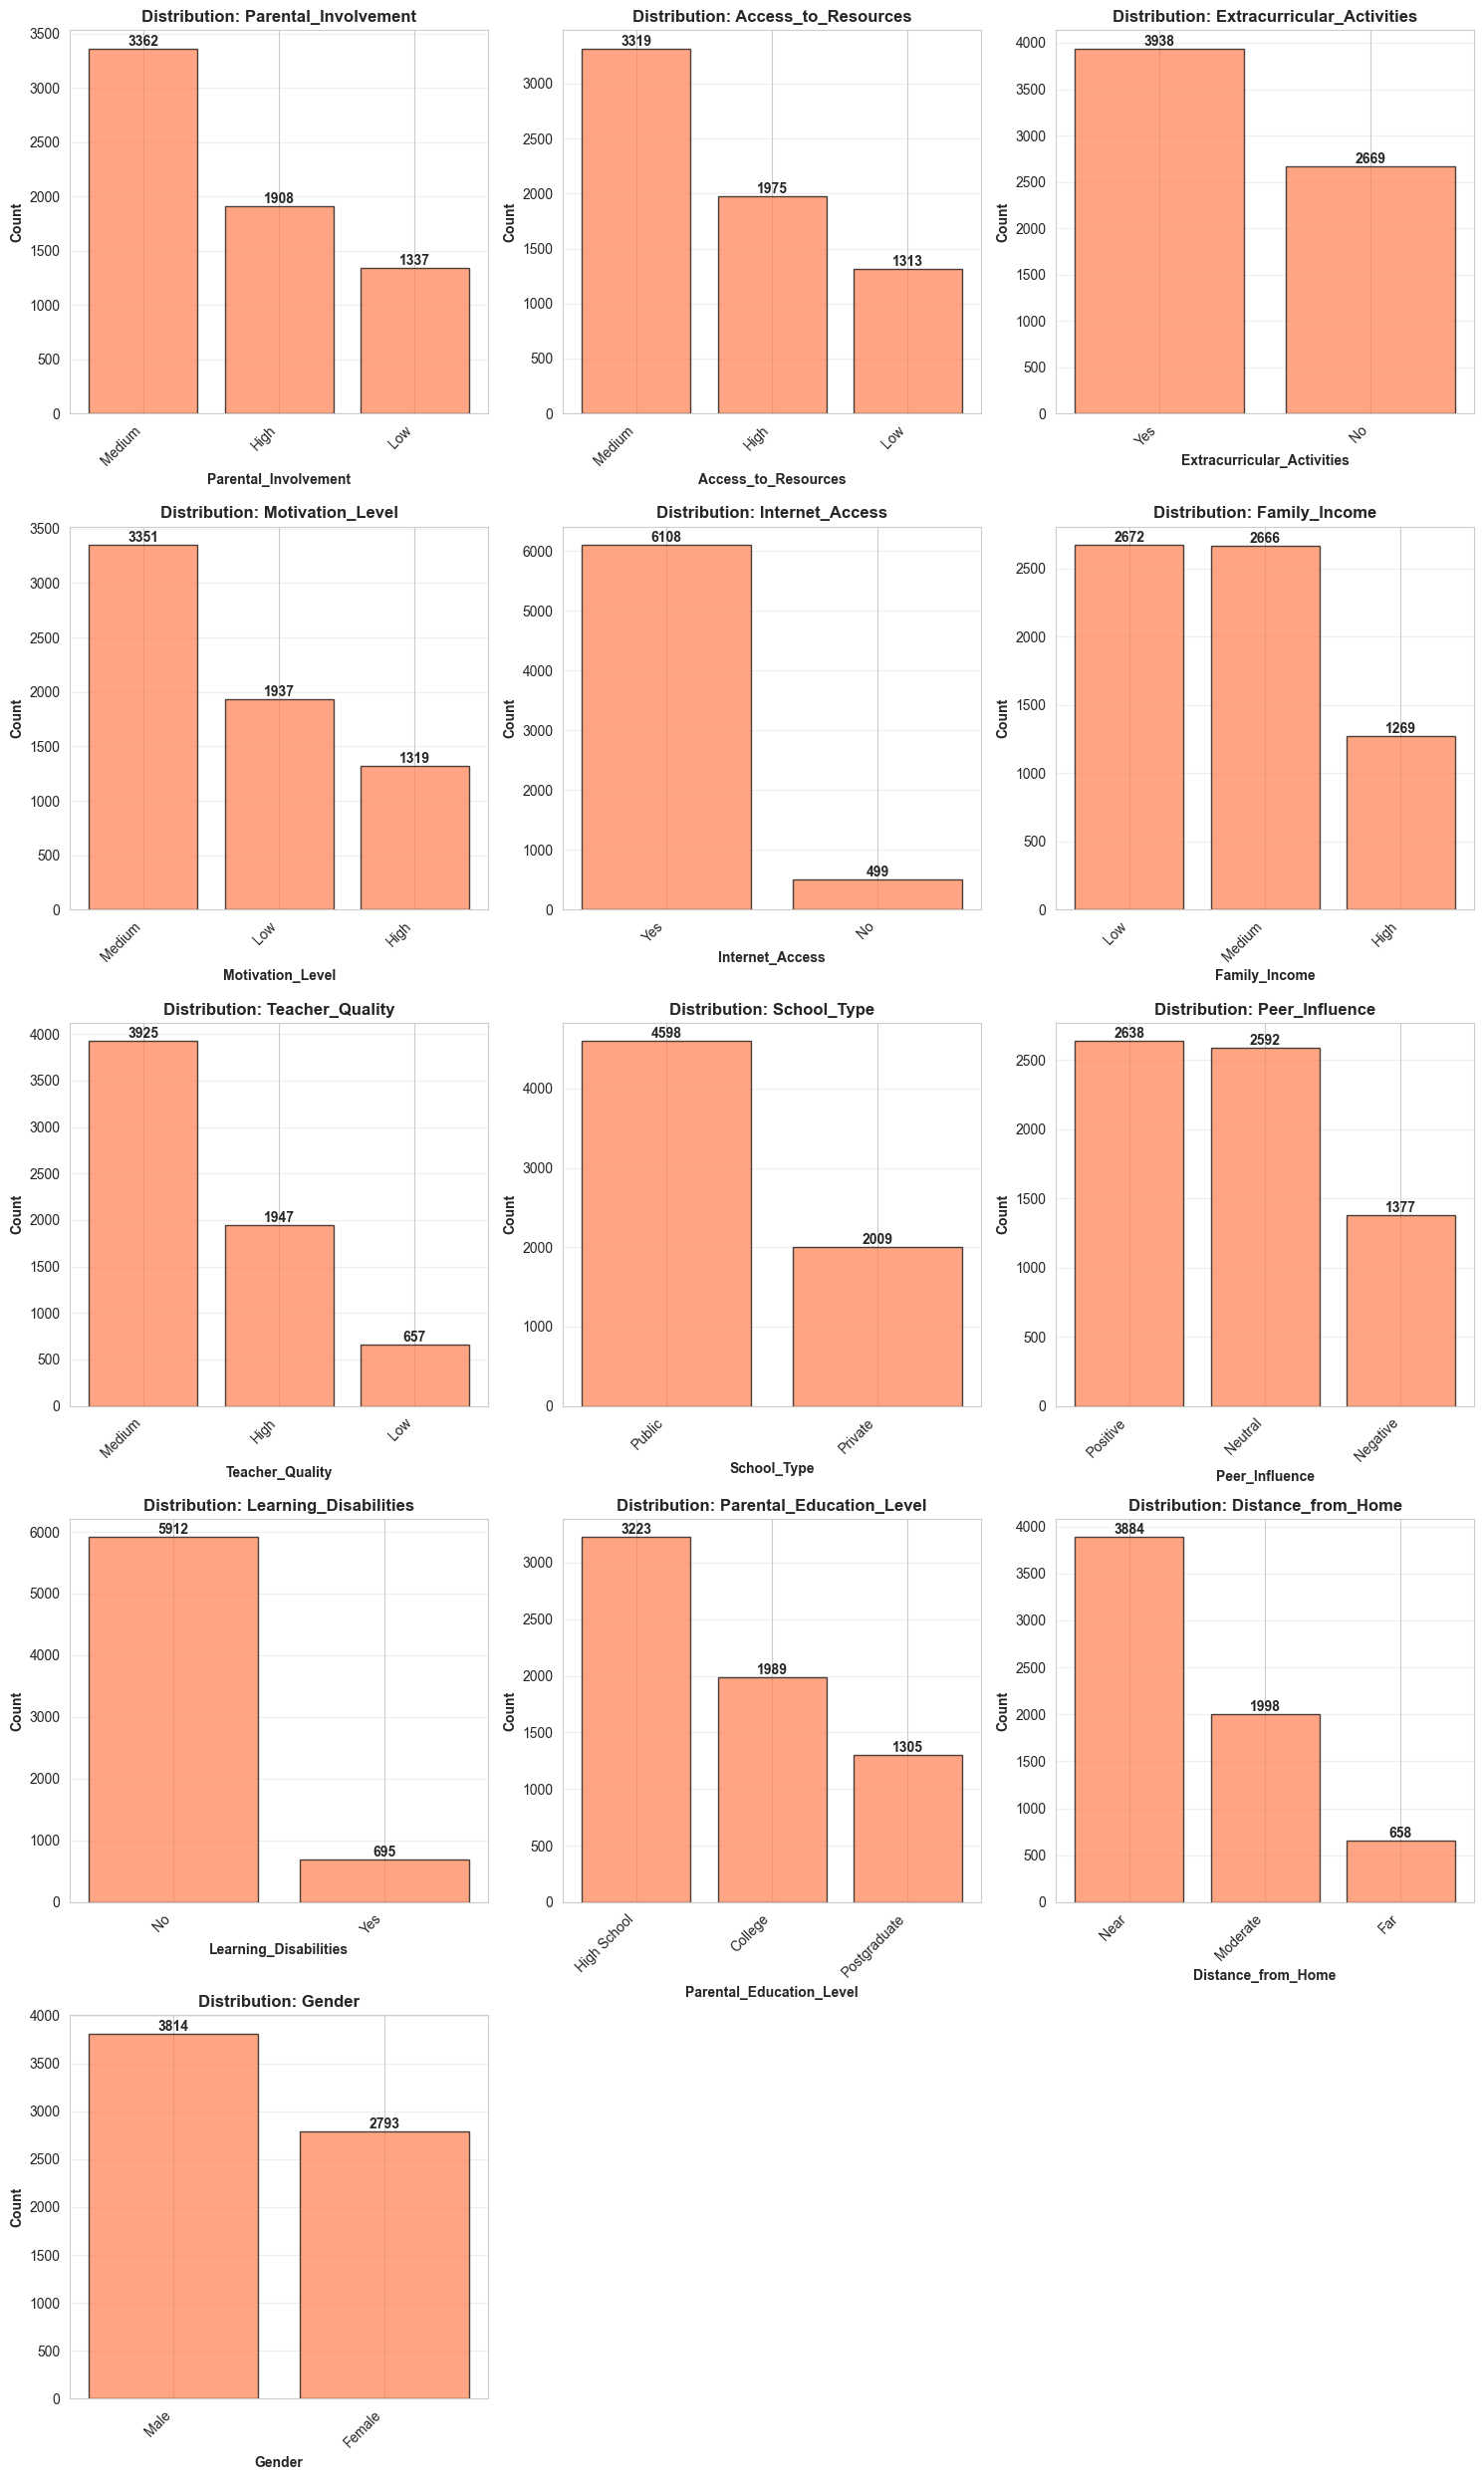

In [10]:
# Categorical Bar Plots
n_cols = 3
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if len(categorical_vars) > 1 else [axes]

for idx, col in enumerate(categorical_vars):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values,
                 color='coral', alpha=0.7, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_xlabel(col, fontweight='bold')
    axes[idx].set_ylabel('Count', fontweight='bold')
    axes[idx].set_title(f'Distribution: {col}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for idx in range(len(categorical_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [11]:
df[categorical_vars].describe()

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6529   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            3925   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq          4598           2638                  5912   

       Parental_Education_Level Distance_from_Home Gender  
count                      6517               6540   6607  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3223               3884   3814

### Continuous variables

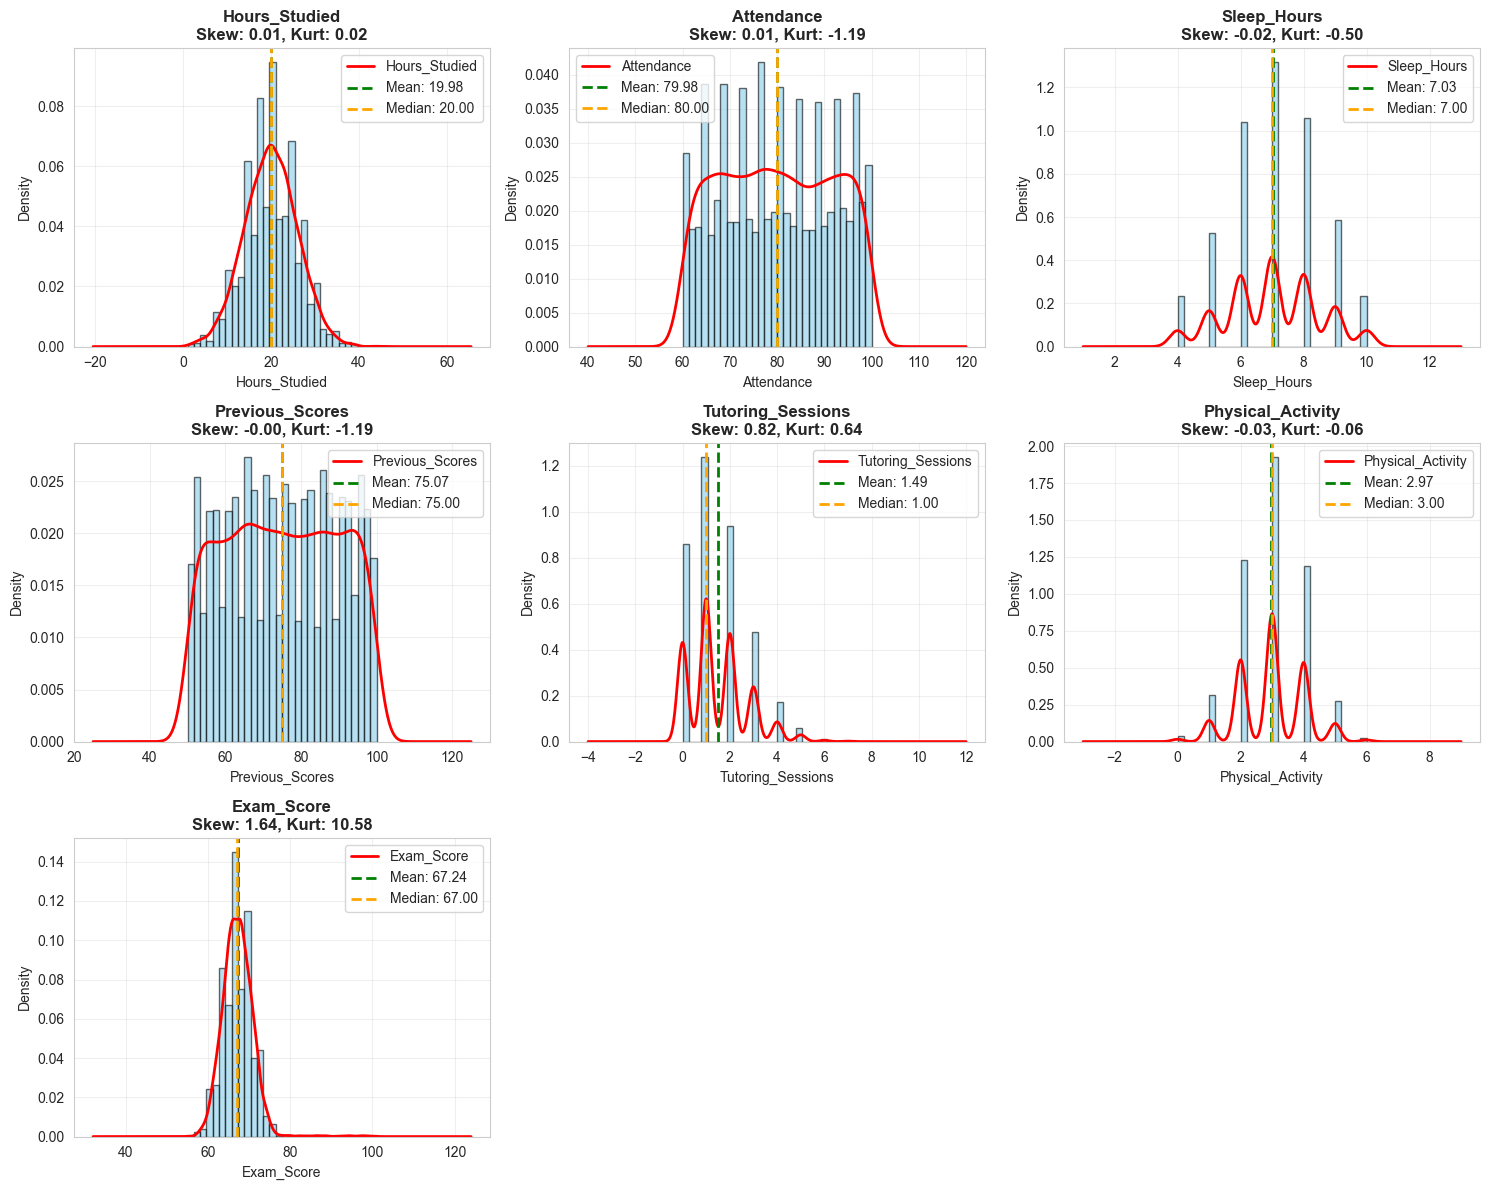

In [12]:
# Distribution plots
n_cols = len(continuous_vars)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(continuous_vars):
    ax = axes[idx]

    # Histogram with KDE
    ax.hist(df[col].dropna(), bins=30, alpha=0.6, color='skyblue', edgecolor='black', density=True)
    df[col].dropna().plot(kind='kde', ax=ax, color='red', linewidth=2)

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    ax.set_title(f'{col}\nSkew: {df[col].skew():.2f}, Kurt: {df[col].kurtosis():.2f}',
                 fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(alpha=0.3)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [13]:
df[continuous_vars].describe().round(2)

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
count        6607.00     6607.00      6607.00          6607.00   
mean           19.98       79.98         7.03            75.07   
std             5.99       11.55         1.47            14.40   
min             1.00       60.00         4.00            50.00   
25%            16.00       70.00         6.00            63.00   
50%            20.00       80.00         7.00            75.00   
75%            24.00       90.00         8.00            88.00   
max            44.00      100.00        10.00           100.00   

       Tutoring_Sessions  Physical_Activity  Exam_Score  
count            6607.00            6607.00     6607.00  
mean                1.49               2.97       67.24  
std                 1.23               1.03        3.89  
min                 0.00               0.00       55.00  
25%                 1.00               2.00       65.00  
50%                 1.00               3.00       67.00  
75%                 2.00               4.00       69.00  
max                 8.00               6.00      101.00

In [14]:
# Skewness and Kurtosis
def skewness_interpretation(skewness) -> str:
    if abs(skewness) < 0.5:
        return 'fairly symmetric'
    elif 0.5 <= abs(skewness) <= 1:
        return 'moderately skewed'
    return 'highly skewed'

skewness = [df[col].skew() for col in continuous_vars]
kurotosis = [df[col].kurtosis() for col in continuous_vars]
interpretation = [skewness_interpretation(i) for i in skewness]

additional_stats = pd.DataFrame({
    'Column': continuous_vars,
    'Skewness': skewness,
    'Kurtosis': kurotosis,
    'Interpretation': interpretation
}).round(3)

additional_stats

Column  Skewness  Kurtosis     Interpretation
0      Hours_Studied     0.013     0.018   fairly symmetric
1         Attendance     0.014    -1.194   fairly symmetric
2        Sleep_Hours    -0.024    -0.504   fairly symmetric
3    Previous_Scores    -0.004    -1.191   fairly symmetric
4  Tutoring_Sessions     0.816     0.644  moderately skewed
5  Physical_Activity    -0.031    -0.059   fairly symmetric
6         Exam_Score     1.645    10.575      highly skewed

In [15]:
# Outlier detection
outlier_summary = []
for col in continuous_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outlier_summary.append({
        'Column': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': f"{(len(outliers)/len(df)*100):.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Column  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound
0      Hours_Studied             43              0.65%        4.00       36.00
1         Attendance              0              0.00%       40.00      120.00
2        Sleep_Hours              0              0.00%        3.00       11.00
3    Previous_Scores              0              0.00%       25.50      125.50
4  Tutoring_Sessions            430              6.51%       -0.50        3.50
5  Physical_Activity              0              0.00%       -1.00        7.00
6         Exam_Score            104              1.57%       59.00       75.00

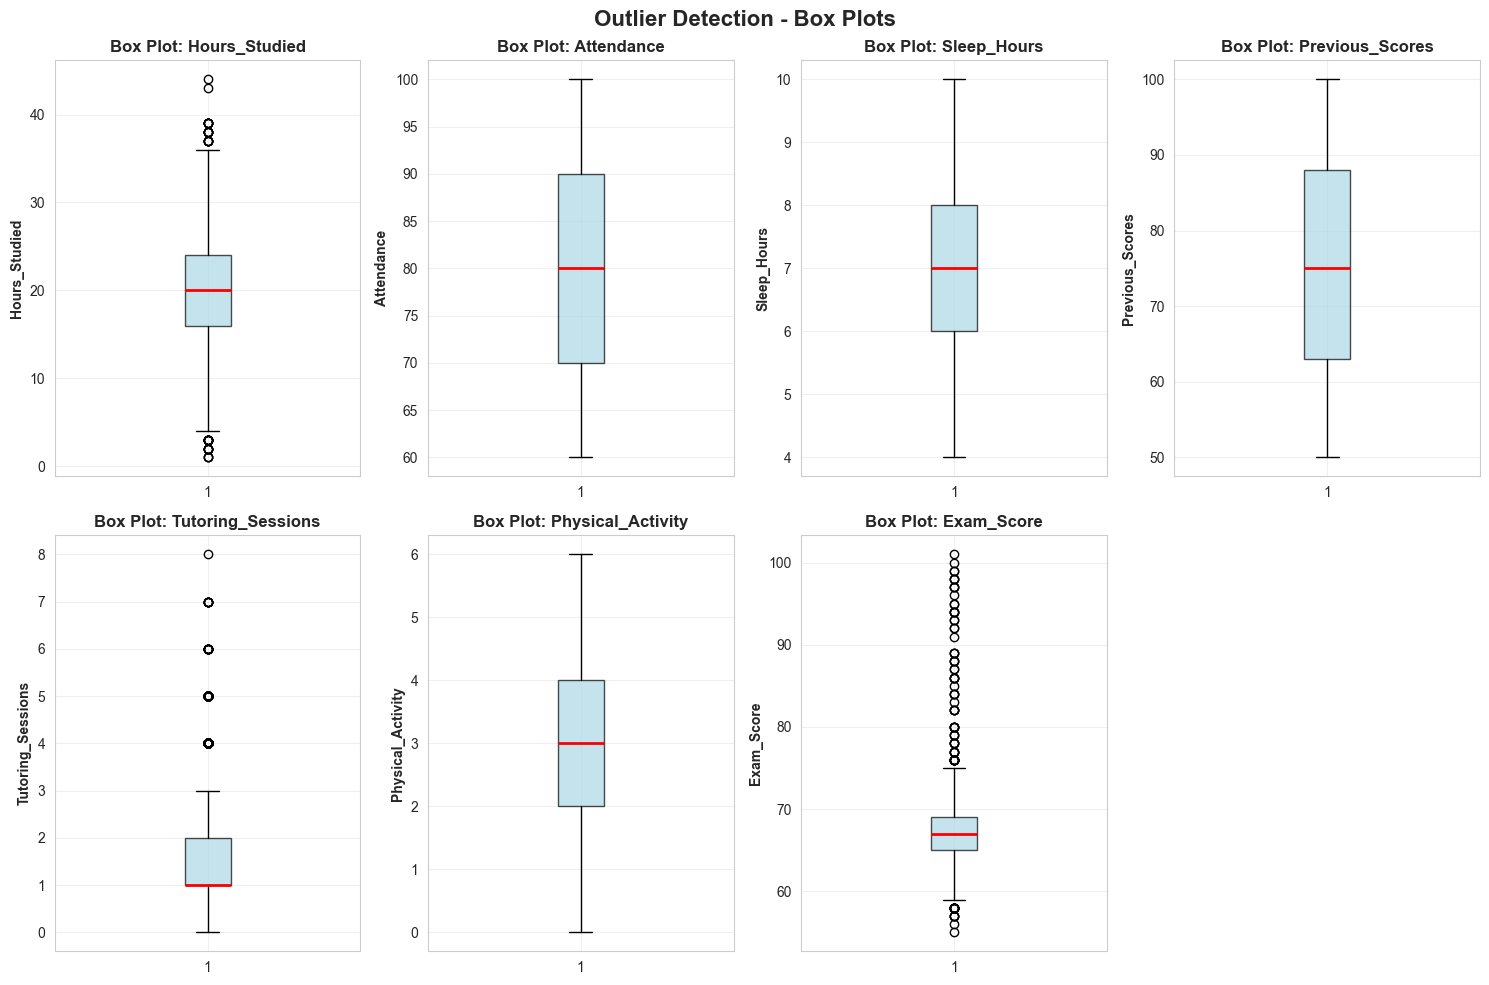

In [16]:
# Outlier visualization
if len(continuous_vars) > 0:
    n_cols = 4
    n_rows = (len(continuous_vars) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(continuous_vars) > 1 else [axes]

    for idx, col in enumerate(continuous_vars):
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_ylabel(col, fontweight='bold')
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

    for idx in range(len(continuous_vars), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

## Bivariate analysis

### Correlation matrix

#### Helper class

In [17]:
# Helper class
class CategoricalCorrelation:
    def __init__(self, df):
        self.df = df

    @staticmethod
    def cramers_v(confusion_matrix):
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum() # Fix: Ensure n is a scalar (total sum)
        min_dim = min(confusion_matrix.shape) - 1
        if min_dim == 0:
            return 0
        return np.sqrt(chi2 / (n * min_dim))

    @staticmethod
    def theils_u(x, y):
        confusion_matrix = pd.crosstab(x, y)
        n = confusion_matrix.sum().sum()
        p_x = confusion_matrix.sum(axis=1) / n
        p_y = confusion_matrix.sum(axis=0) / n
        p_xy = confusion_matrix / n
        h_x = -np.sum(p_x * np.log(p_x + 1e-10))
        h_xy = 0
        for j in range(len(p_y)):
            if p_y.iloc[j] > 0:
                p_x_given_y = p_xy.iloc[:, j] / p_y.iloc[j]
                h_xy += p_y.iloc[j] * (-np.sum(p_x_given_y * np.log(p_x_given_y + 1e-10)))
        if h_x == 0:
            return 0
        return (h_x - h_xy) / h_x

    @staticmethod
    def correlation_ratio(categories, values):
        # Handle missing values by dropping rows where either category or value is NaN
        temp_df = pd.DataFrame({'categories': categories, 'values': values}).dropna()

        if temp_df.empty:
            return 0  # Return 0 or NaN if no valid data points remain

        categories = np.array(temp_df['categories'])
        values = np.array(temp_df['values'])

        mean_total = np.mean(values)
        categories_unique = np.unique(categories)
        ss_between = 0
        for cat in categories_unique:
            values_cat = values[categories == cat]
            n_cat = len(values_cat)
            mean_cat = np.mean(values_cat)
            ss_between += n_cat * (mean_cat - mean_total) ** 2
        ss_total = np.sum((values - mean_total) ** 2)
        if ss_total == 0:
            return 0
        return np.sqrt(ss_between / ss_total)

    def chi_square_test(self, var1, var2):
        confusion_matrix = pd.crosstab(self.df[var1], self.df[var2])
        chi2, p_value, dof, expected = chi2_contingency(confusion_matrix)
        cramers = self.cramers_v(confusion_matrix)
        return {
            'chi2': chi2,
            'p_value': p_value,
            'dof': dof,
            'cramers_v': cramers
        }

    def point_biserial(self, binary_var, continuous_var):
        binary_series = self.df[binary_var].copy()
        continuous_series = self.df[continuous_var].copy()

        # Convert binary_var to numeric (0/1) if it's not already
        if binary_series.dtype == 'object':
            binary_series_numeric, _ = pd.factorize(binary_series)
            binary_series = pd.Series(binary_series_numeric, index=binary_series.index)

        # Drop NaNs before correlation calculation to avoid issues
        temp_df = pd.DataFrame({
            'binary': binary_series,
            'continuous': continuous_series
        }).dropna()

        if temp_df.empty:
            # Return NaNs if there's no valid data after dropping NaNs
            return {'correlation': np.nan, 'p_value': np.nan}

        corr, p_value = pointbiserialr(temp_df['binary'], temp_df['continuous'])
        return {'correlation': corr, 'p_value': p_value}

    def anova_test(self, categorical_var, continuous_var):
        groups = [group[continuous_var].values for name, group in self.df.groupby(categorical_var)]
        f_stat, p_value = stats.f_oneway(*groups)
        eta = self.correlation_ratio(self.df[categorical_var], self.df[continuous_var])
        return {
            'f_statistic': f_stat,
            'p_value': p_value,
            'eta': eta,
            'eta_squared': eta ** 2
        }

    def categorical_correlation_matrix(self, categorical_vars, method='cramers_v'):
        n_vars = len(categorical_vars)
        corr_matrix = np.zeros((n_vars, n_vars))
        for i, var1 in enumerate(categorical_vars):
            for j, var2 in enumerate(categorical_vars):
                if i == j:
                    corr_matrix[i, j] = 1.0
                else:
                    if method == 'cramers_v':
                        confusion_matrix = pd.crosstab(self.df[var1], self.df[var2])
                        corr_matrix[i, j] = self.cramers_v(confusion_matrix)
                    elif method == 'theils_u':
                        corr_matrix[i, j] = self.theils_u(self.df[var1], self.df[var2])
        return pd.DataFrame(corr_matrix, index=categorical_vars, columns=categorical_vars)

    def mixed_correlation_analysis(self, categorical_vars, continuous_vars):
        n_cat = len(categorical_vars)
        n_cont = len(continuous_vars)
        corr_matrix = np.zeros((n_cat, n_cont))
        for i, cat_var in enumerate(categorical_vars):
            for j, cont_var in enumerate(continuous_vars):
                eta = self.correlation_ratio(self.df[cat_var], self.df[cont_var])
                corr_matrix[i, j] = eta
        return pd.DataFrame(corr_matrix, index=categorical_vars, columns=continuous_vars)

#### Correlation matrix between continous and continous

In [18]:
df_cont = df[continuous_vars]
df_cont['Exam_Score_Category'] = pd.qcut(df_cont['Exam_Score'], q=3, labels=['Low', 'Medium', 'High'])
df_cont_low = df_cont[df_cont['Exam_Score_Category'] == 'Low'].drop('Exam_Score_Category', axis=1)
df_cont_med = df_cont[df_cont['Exam_Score_Category'] ==  'Medium'].drop('Exam_Score_Category', axis=1)
df_cont_high = df_cont[df_cont['Exam_Score_Category'] == 'High'].drop('Exam_Score_Category', axis=1)

df_cont_mapping = {
    'Full view': df_cont.drop('Exam_Score_Category', axis=1),
    'Low performance': df_cont_low,
    'Medium performance': df_cont_med,
    'High performance': df_cont_high
}

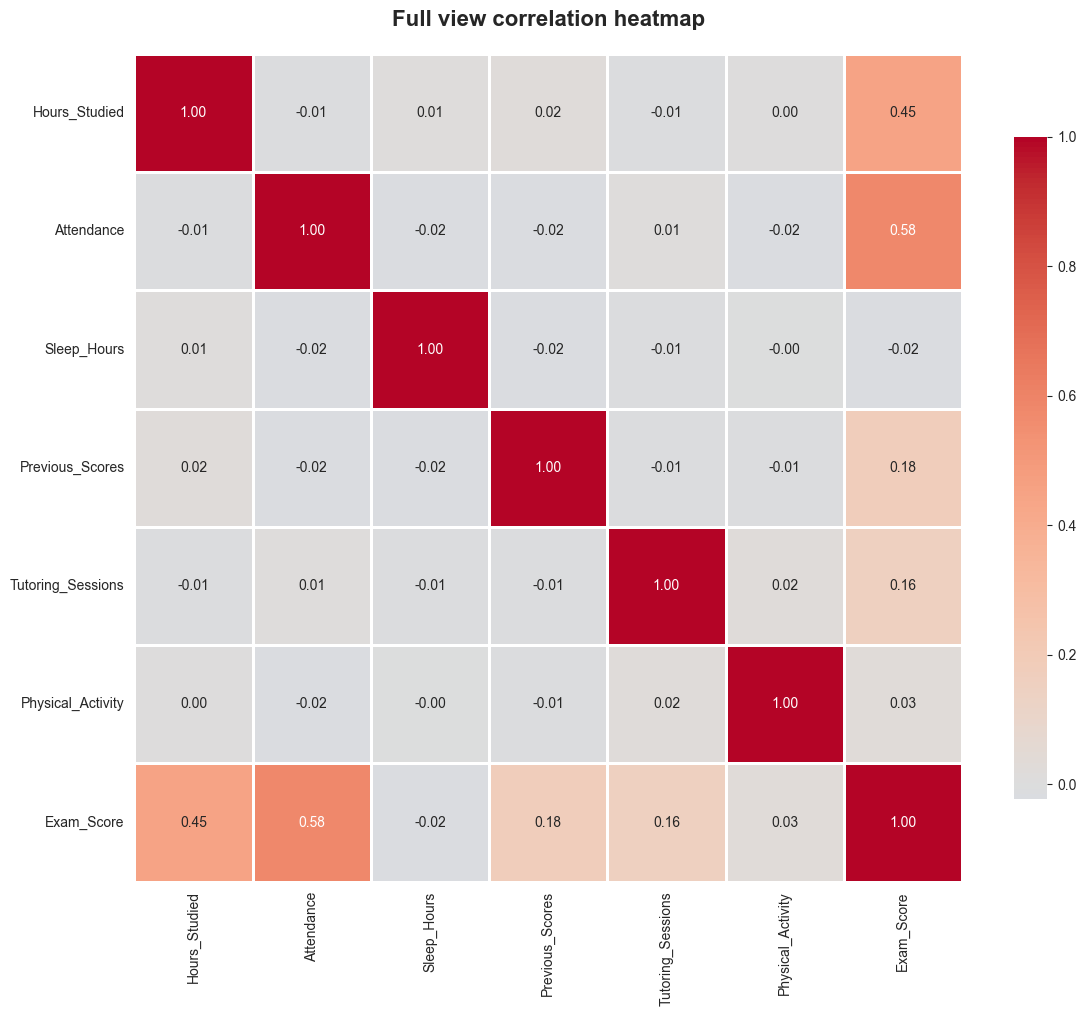

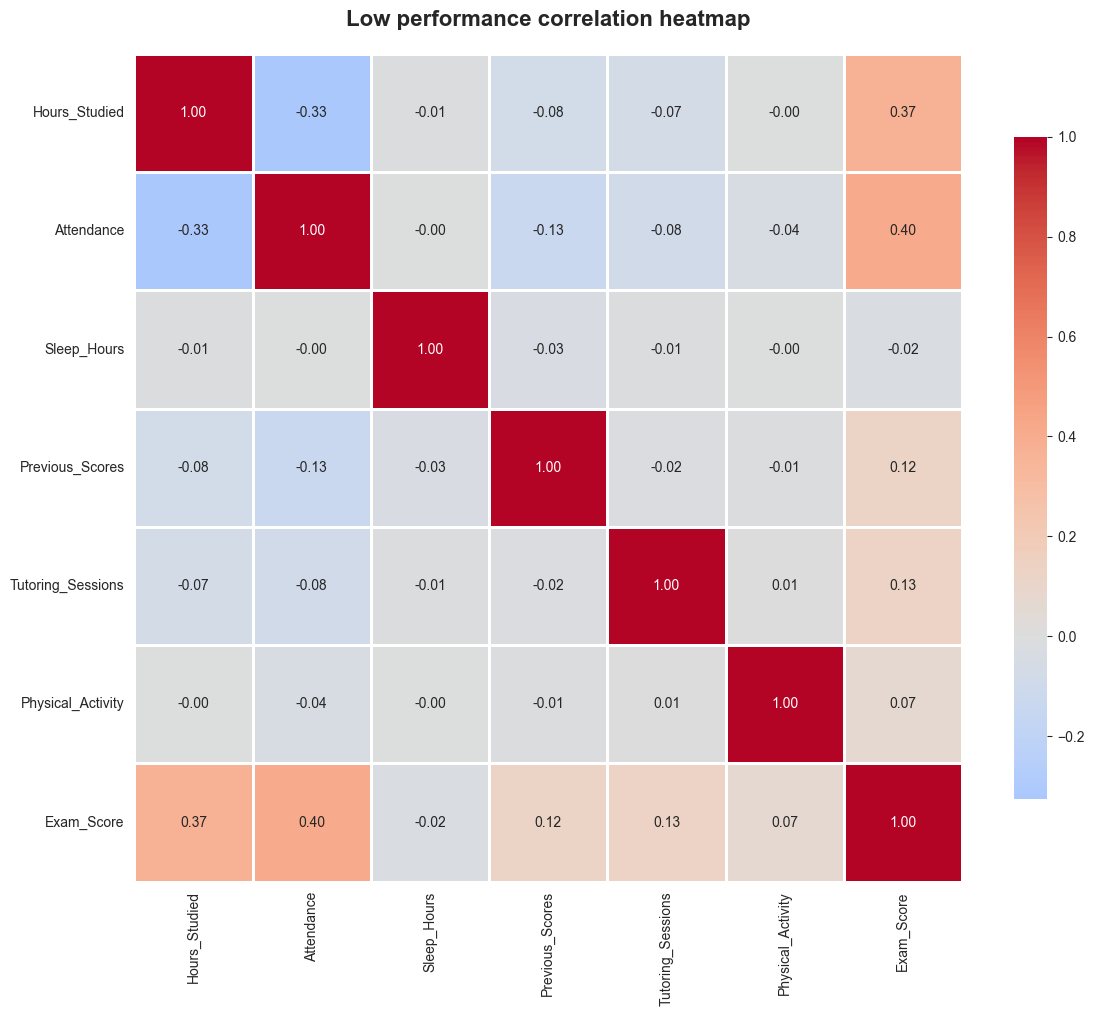

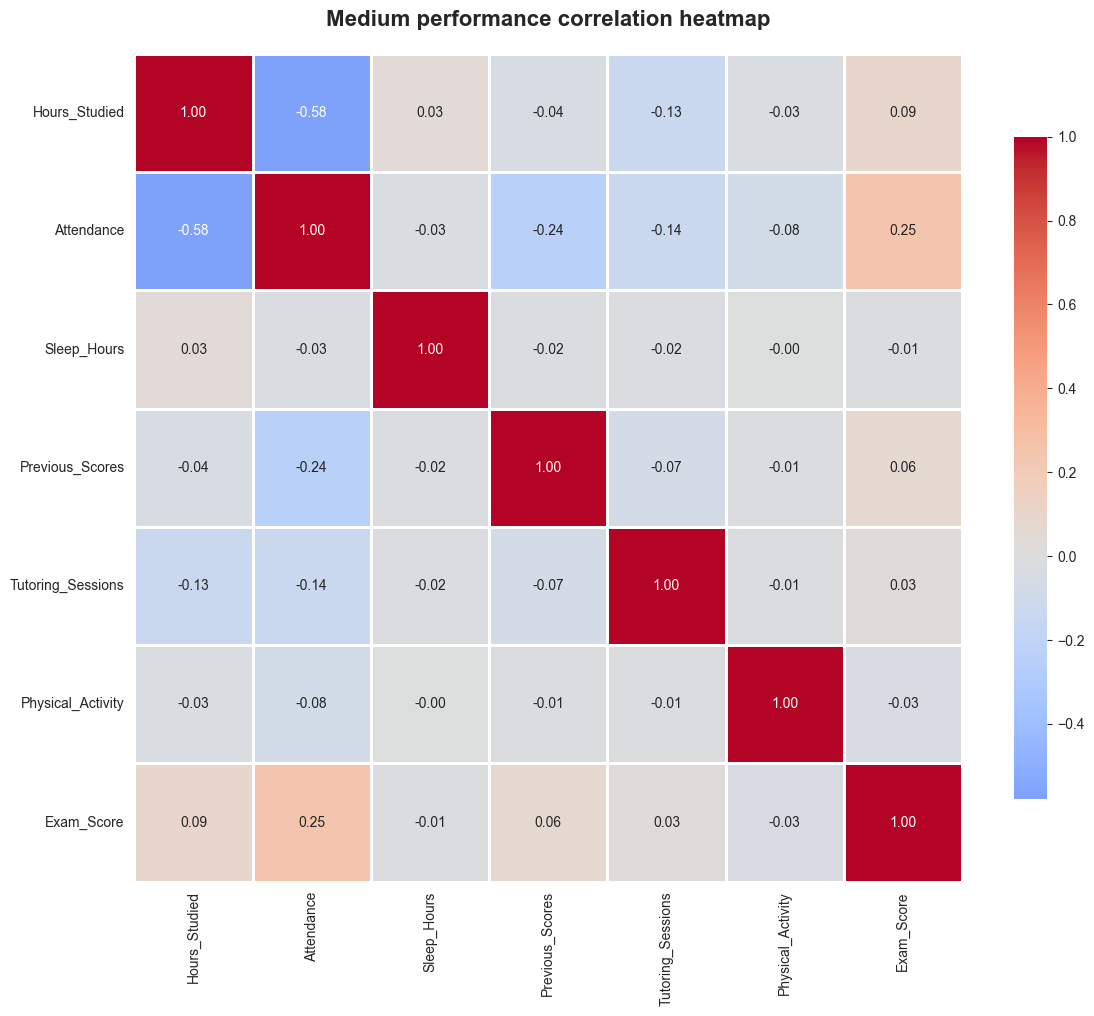

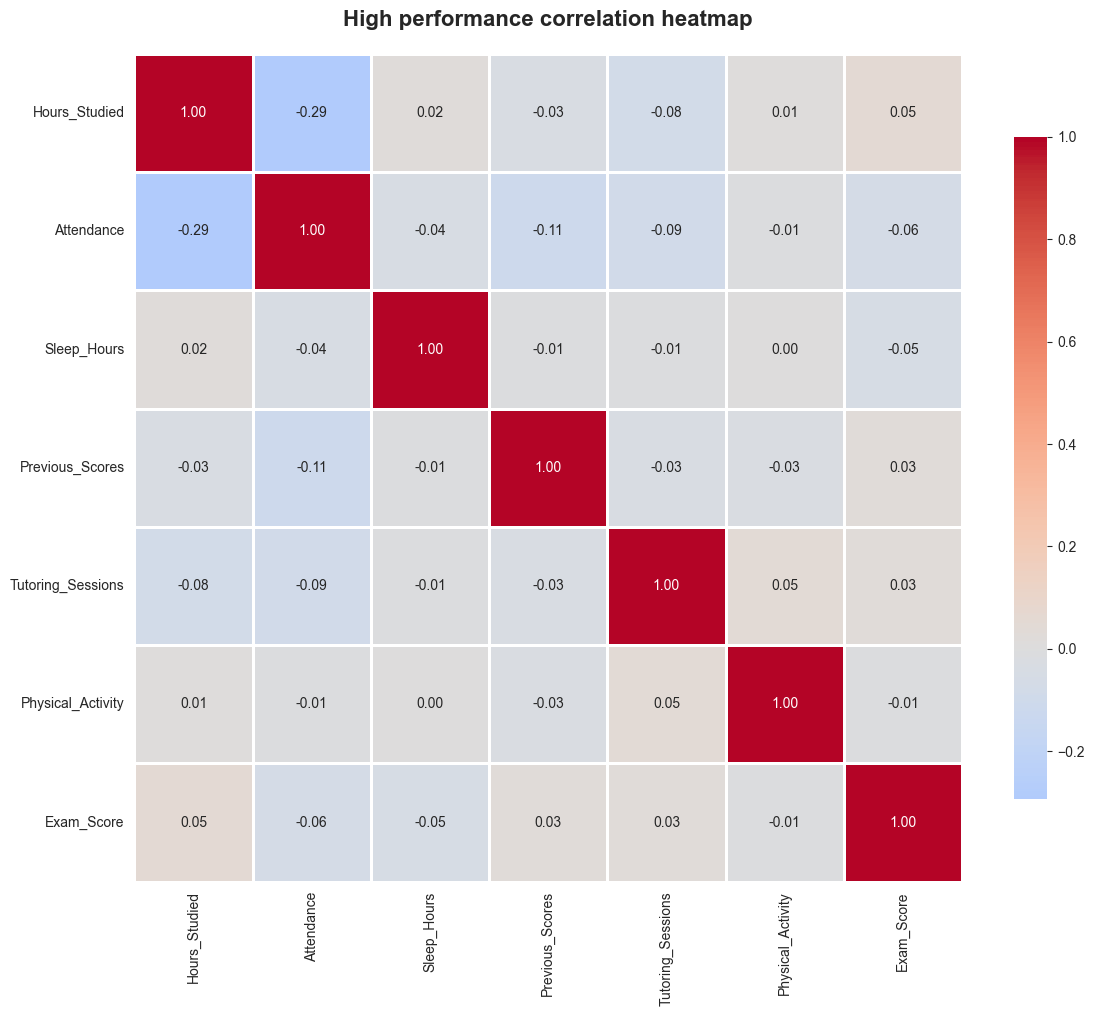

In [19]:
# Correlation matrix
for df_name in df_cont_mapping.keys():
    correlation_matrix = df_cont_mapping[df_name].corr()
    correlation_matrix.round(3)
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(f'{df_name} correlation heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

#### Correlation between categorical and categorical

In [20]:
cat_cols_with_target = categorical_vars + [DATASET_TARGET]
df_cat = df[cat_cols_with_target]
df_cat['Exam_Score_Category'] = pd.qcut(df_cat['Exam_Score'], q=3, labels=['Low', 'Medium', 'High'])
df_cat_low = df_cat[df_cat['Exam_Score_Category'] == 'Low'].drop('Exam_Score_Category', axis=1)
df_cat_med = df_cat[df_cat['Exam_Score_Category'] ==  'Medium'].drop('Exam_Score_Category', axis=1)
df_cat_high = df_cat[df_cat['Exam_Score_Category'] == 'High'].drop('Exam_Score_Category', axis=1)

df_cat.drop(['Exam_Score_Category', 'Exam_Score'], axis=1)

analyzer_mapping = {
    'Full view': CategoricalCorrelation(df_cat),
    'Low performance': CategoricalCorrelation(df_cat_low),
    'Medium performance': CategoricalCorrelation(df_cat_med),
    'High performance': CategoricalCorrelation(df_cat_high)
}

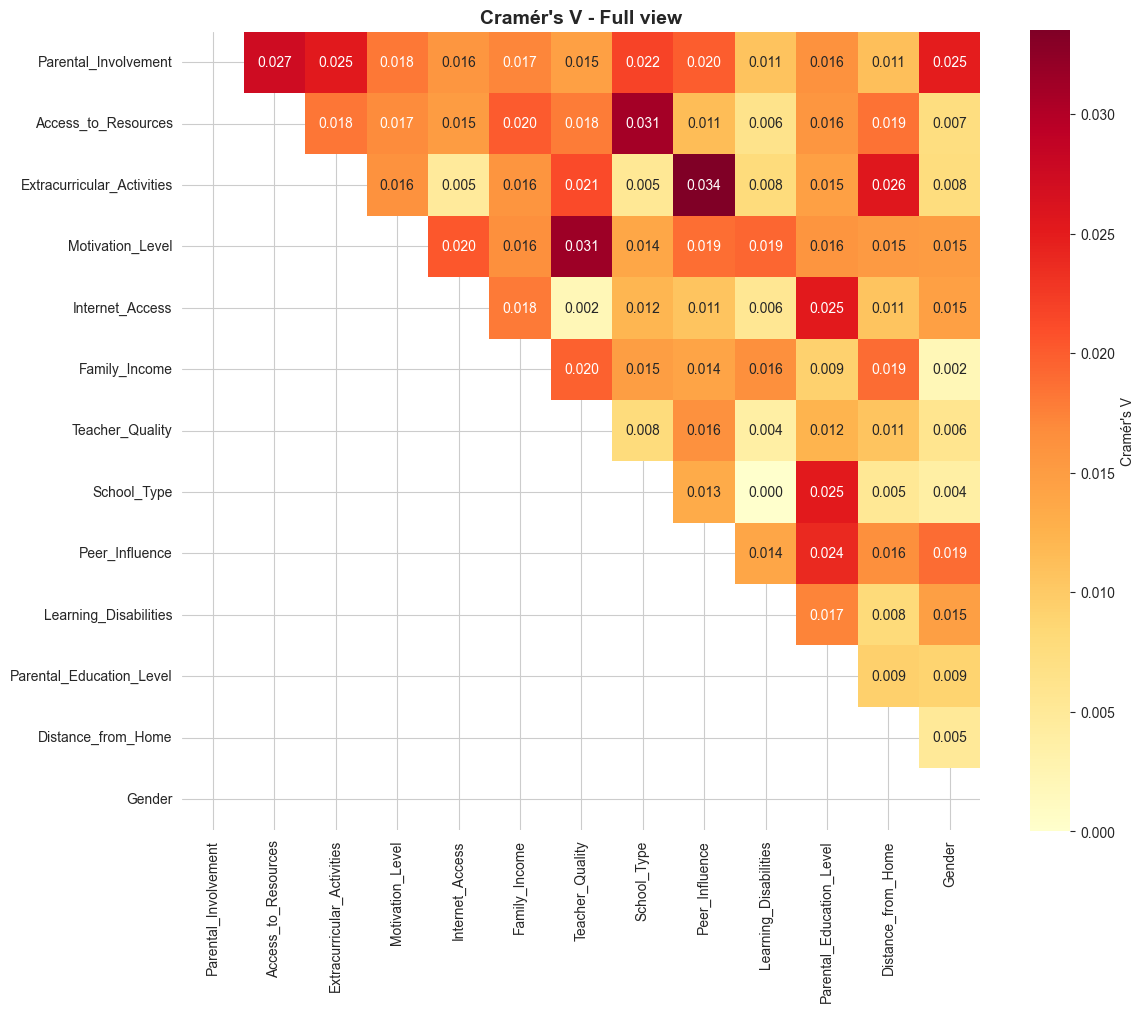

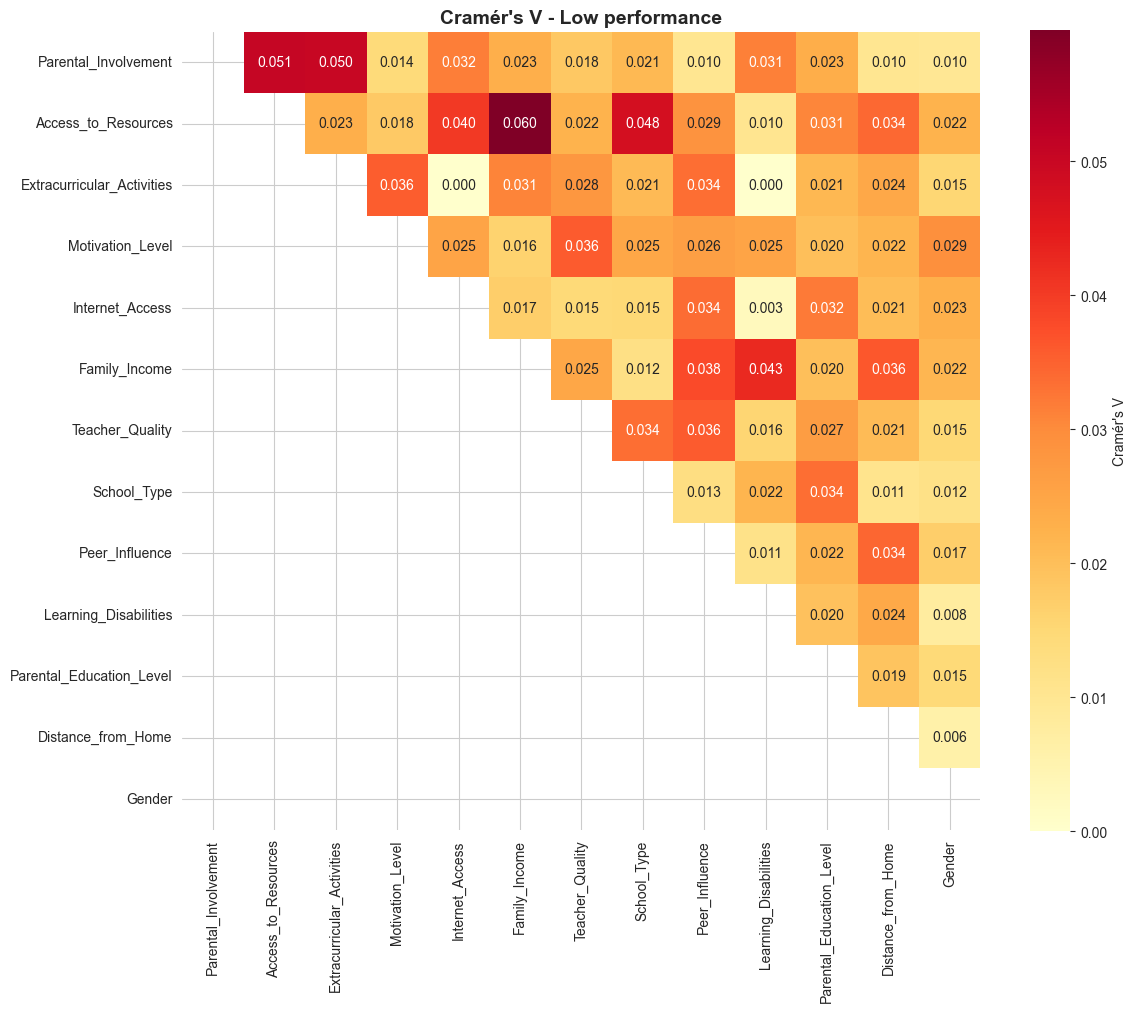

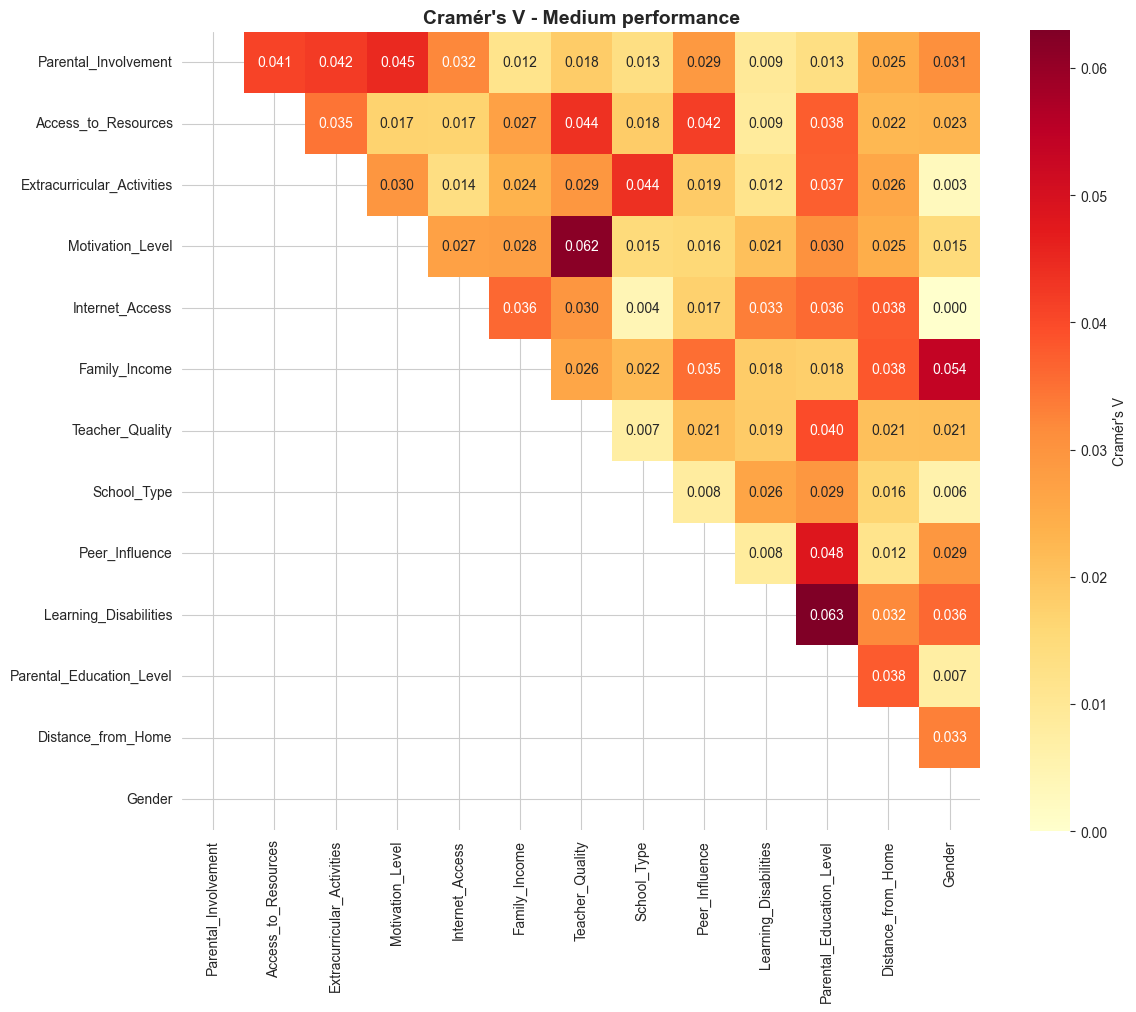

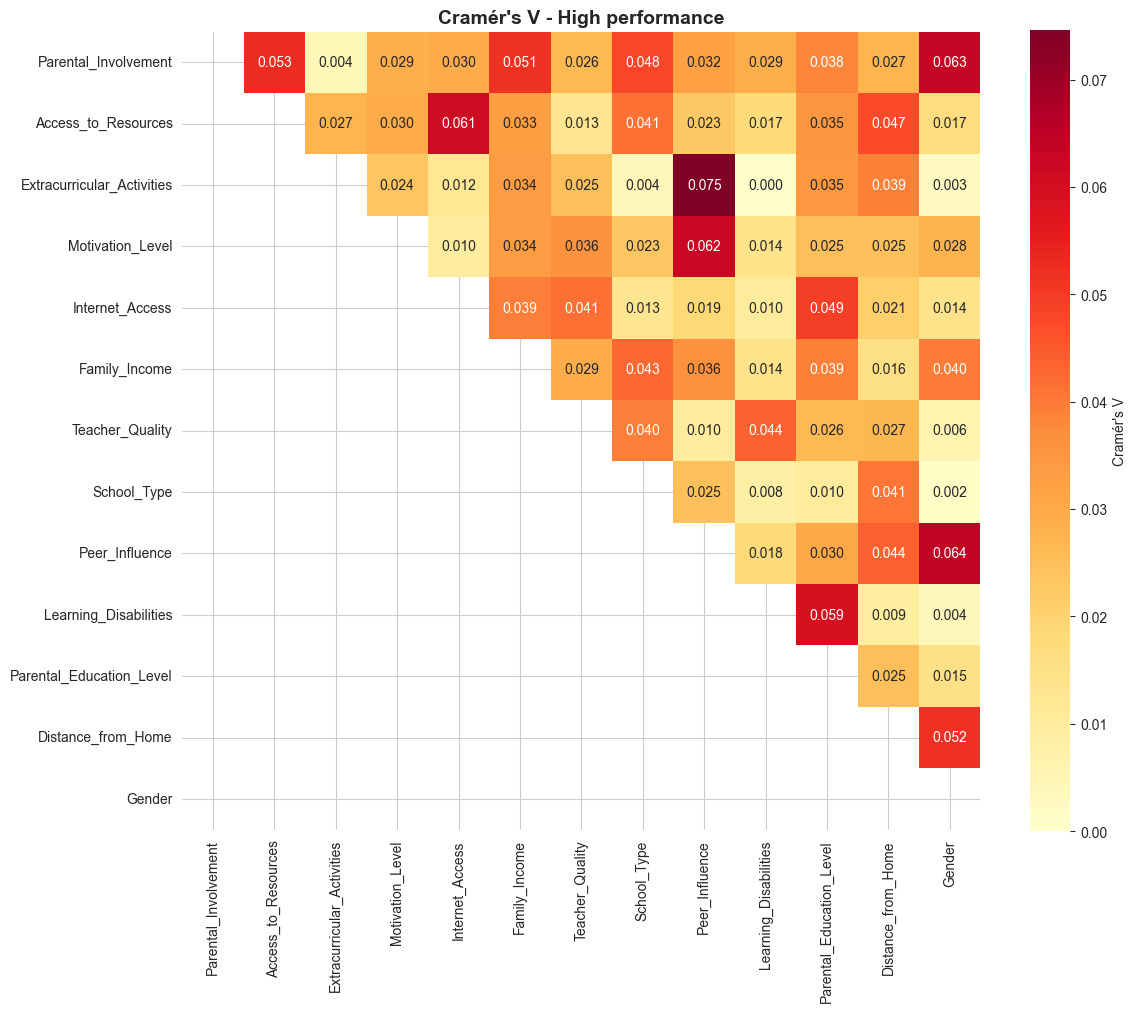

In [21]:
for analyzer_name in analyzer_mapping.keys():
    analyzer = analyzer_mapping[analyzer_name]
    cramers_matrix = analyzer.categorical_correlation_matrix(categorical_vars, method='cramers_v')

    for i in range(len(categorical_vars)):
        for j in range(i+1, len(categorical_vars)):
            if cramers_matrix.iloc[i, j] > 0.2:
                print(f"  {categorical_vars[i]} ↔ {categorical_vars[j]}: {cramers_matrix.iloc[i, j]:.3f}")

    # Visualize
    mask = np.tril(np.ones_like(cramers_matrix, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(cramers_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
                square=True, cbar_kws={'label': "Cramér's V"}, mask=mask)
                # , vmin=V_MIN, vmax=V_MAX)
    plt.title(f"Cramér's V - {analyzer_name}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

#### Correlation matrix between categorical and continous

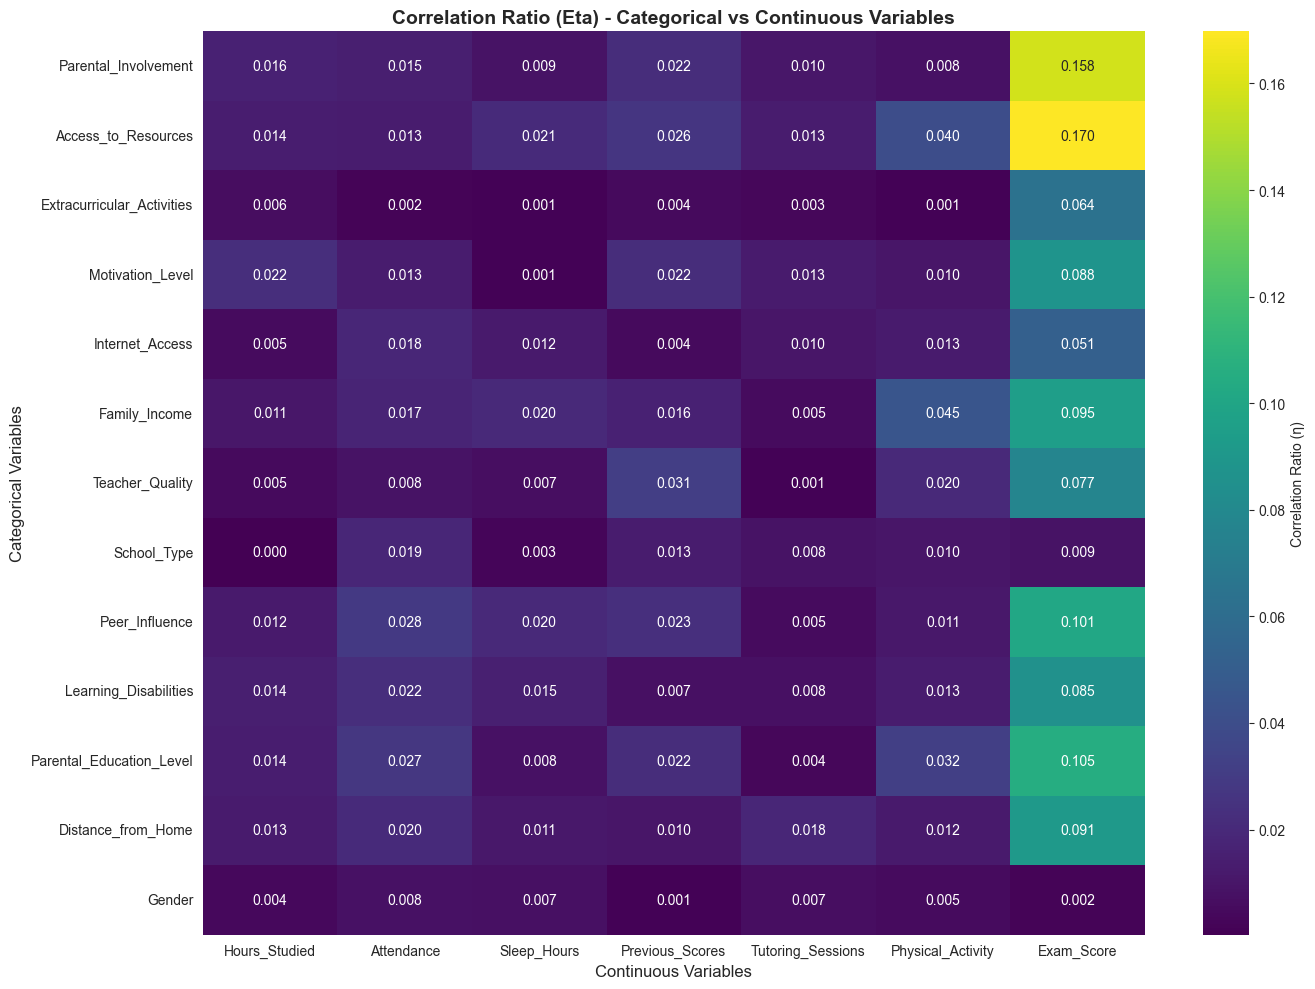

In [22]:
full_analyzer = CategoricalCorrelation(df)
mixed_corr = full_analyzer.mixed_correlation_analysis(categorical_vars, continuous_vars)

for cat_var in categorical_vars:
    for cont_var in continuous_vars:
        eta_val = mixed_corr.loc[cat_var, cont_var]
        if eta_val > 0.2:
            print(f"  {cat_var} → {cont_var}: η = {eta_val:.3f} (explains {eta_val**2:.1%} of variance)")

# Visualize
plt.figure(figsize=(14, 10))
sns.heatmap(mixed_corr, annot=True, fmt='.3f', cmap='viridis',
            cbar_kws={'label': 'Correlation Ratio (η)'})
plt.title("Correlation Ratio (Eta) - Categorical vs Continuous Variables",
            fontsize=14, fontweight='bold')
plt.xlabel("Continuous Variables", fontsize=12)
plt.ylabel("Categorical Variables", fontsize=12)
plt.tight_layout()
plt.show()

#### Correlation with Dataset Target


All factors ranked by effect size:
                  Variable           Test  Statistic       P-value  Effect_Size  Significant
                Attendance        Pearson   0.581072  0.000000e+00     0.581072         True
             Hours_Studied        Pearson   0.445455 1.286349e-319     0.445455         True
           Previous_Scores        Pearson   0.175079  1.244380e-46     0.175079         True
         Tutoring_Sessions        Pearson   0.156525  1.650817e-37     0.156525         True
      Parental_Involvement          ANOVA   2.194239  1.117740e-01     0.051945        False
Extracurricular_Activities Point-Biserial  -0.046293  6.208260e-02     0.046293        False
        Distance_from_Home          ANOVA   1.564267  2.095592e-01     0.044039        False
                    Gender Point-Biserial   0.039902  1.078603e-01     0.039902        False
             Family_Income          ANOVA   1.212496  2.977234e-01     0.038637        False
       Access_to_Resources        

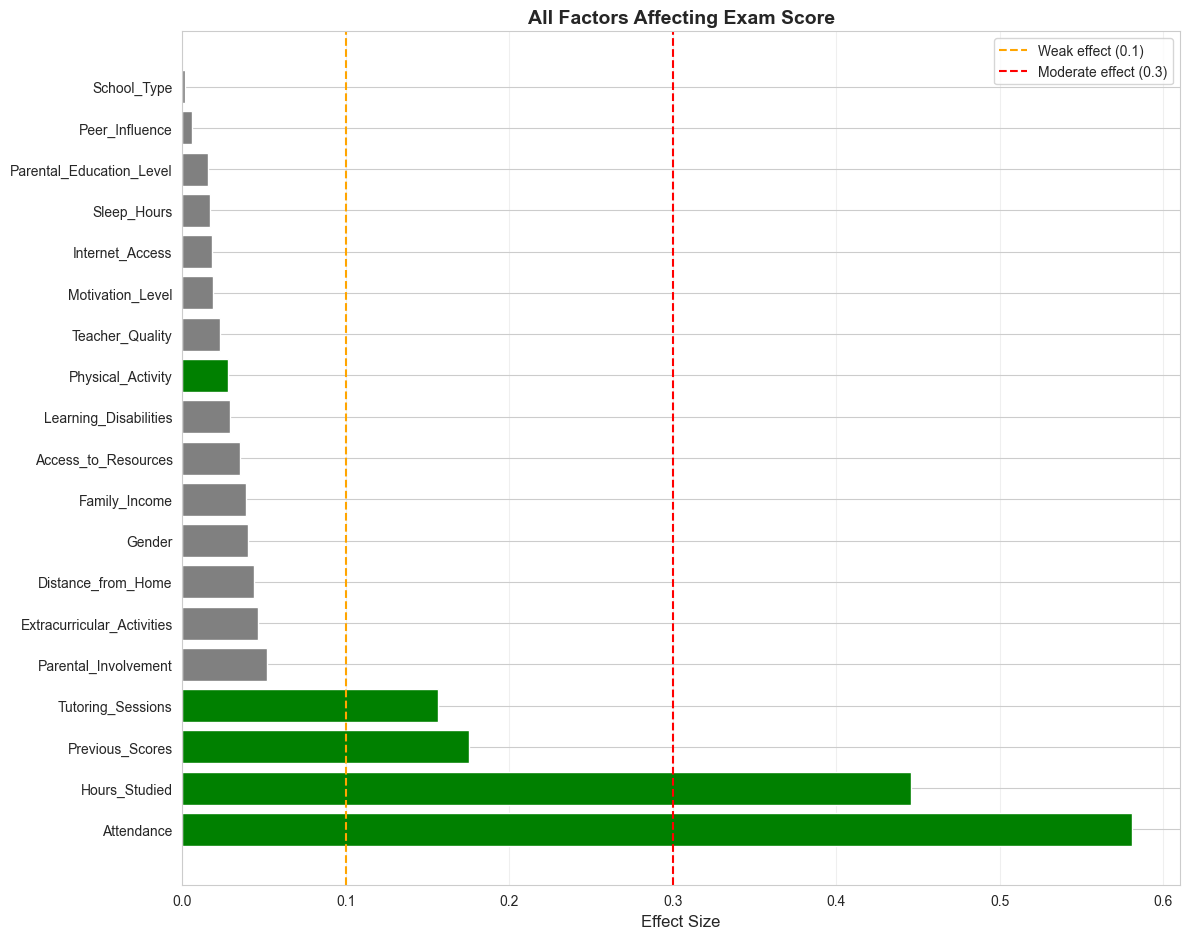

In [23]:
results_list = []

for var in df.columns:
    if var == DATASET_TARGET:
        continue

    result = {'Variable': var}

    # Determine variable type
    if var in binary_vars:

        # Point-biserial correlation
        pb_result = analyzer.point_biserial(var, DATASET_TARGET)
        result['Test'] = 'Point-Biserial'
        result['Statistic'] = pb_result['correlation']
        result['P-value'] = pb_result['p_value']
        result['Effect_Size'] = abs(pb_result['correlation'])

    elif var in categorical_vars:
        anova_result = analyzer.anova_test(var, DATASET_TARGET)
        result['Test'] = 'ANOVA'
        result['Statistic'] = anova_result['f_statistic']
        result['P-value'] = anova_result['p_value']
        result['Effect_Size'] = anova_result['eta']

    else:

        corr, p_val = stats.pearsonr(df[var].dropna(), df[DATASET_TARGET].dropna())
        result['Test'] = 'Pearson'
        result['Statistic'] = corr
        result['P-value'] = p_val
        result['Effect_Size'] = abs(corr)

    results_list.append(result)

results_df = pd.DataFrame(results_list)
results_df['Significant'] = results_df['P-value'] < 0.05
results_df = results_df.sort_values('Effect_Size', ascending=False)

print("\nAll factors ranked by effect size:")
print(results_df.to_string(index=False))

# Visualize ALL factors (removed top_n limit)
all_factors = results_df

# Adjust figure size dynamically based on the number of factors
fig_height = max(8, len(all_factors) * 0.5) # Minimum height 8, 0.5 inches per factor
plt.figure(figsize=(12, fig_height))
colors = ['green' if sig else 'gray' for sig in all_factors['Significant']]
plt.barh(range(len(all_factors)), all_factors['Effect_Size'], color=colors)
plt.yticks(range(len(all_factors)), all_factors['Variable'])
plt.xlabel('Effect Size', fontsize=12)
plt.title(f'All Factors Affecting Exam Score', fontsize=14, fontweight='bold')
plt.axvline(x=0.1, color='orange', linestyle='--', label='Weak effect (0.1)')
plt.axvline(x=0.3, color='red', linestyle='--', label='Moderate effect (0.3)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Pairplot

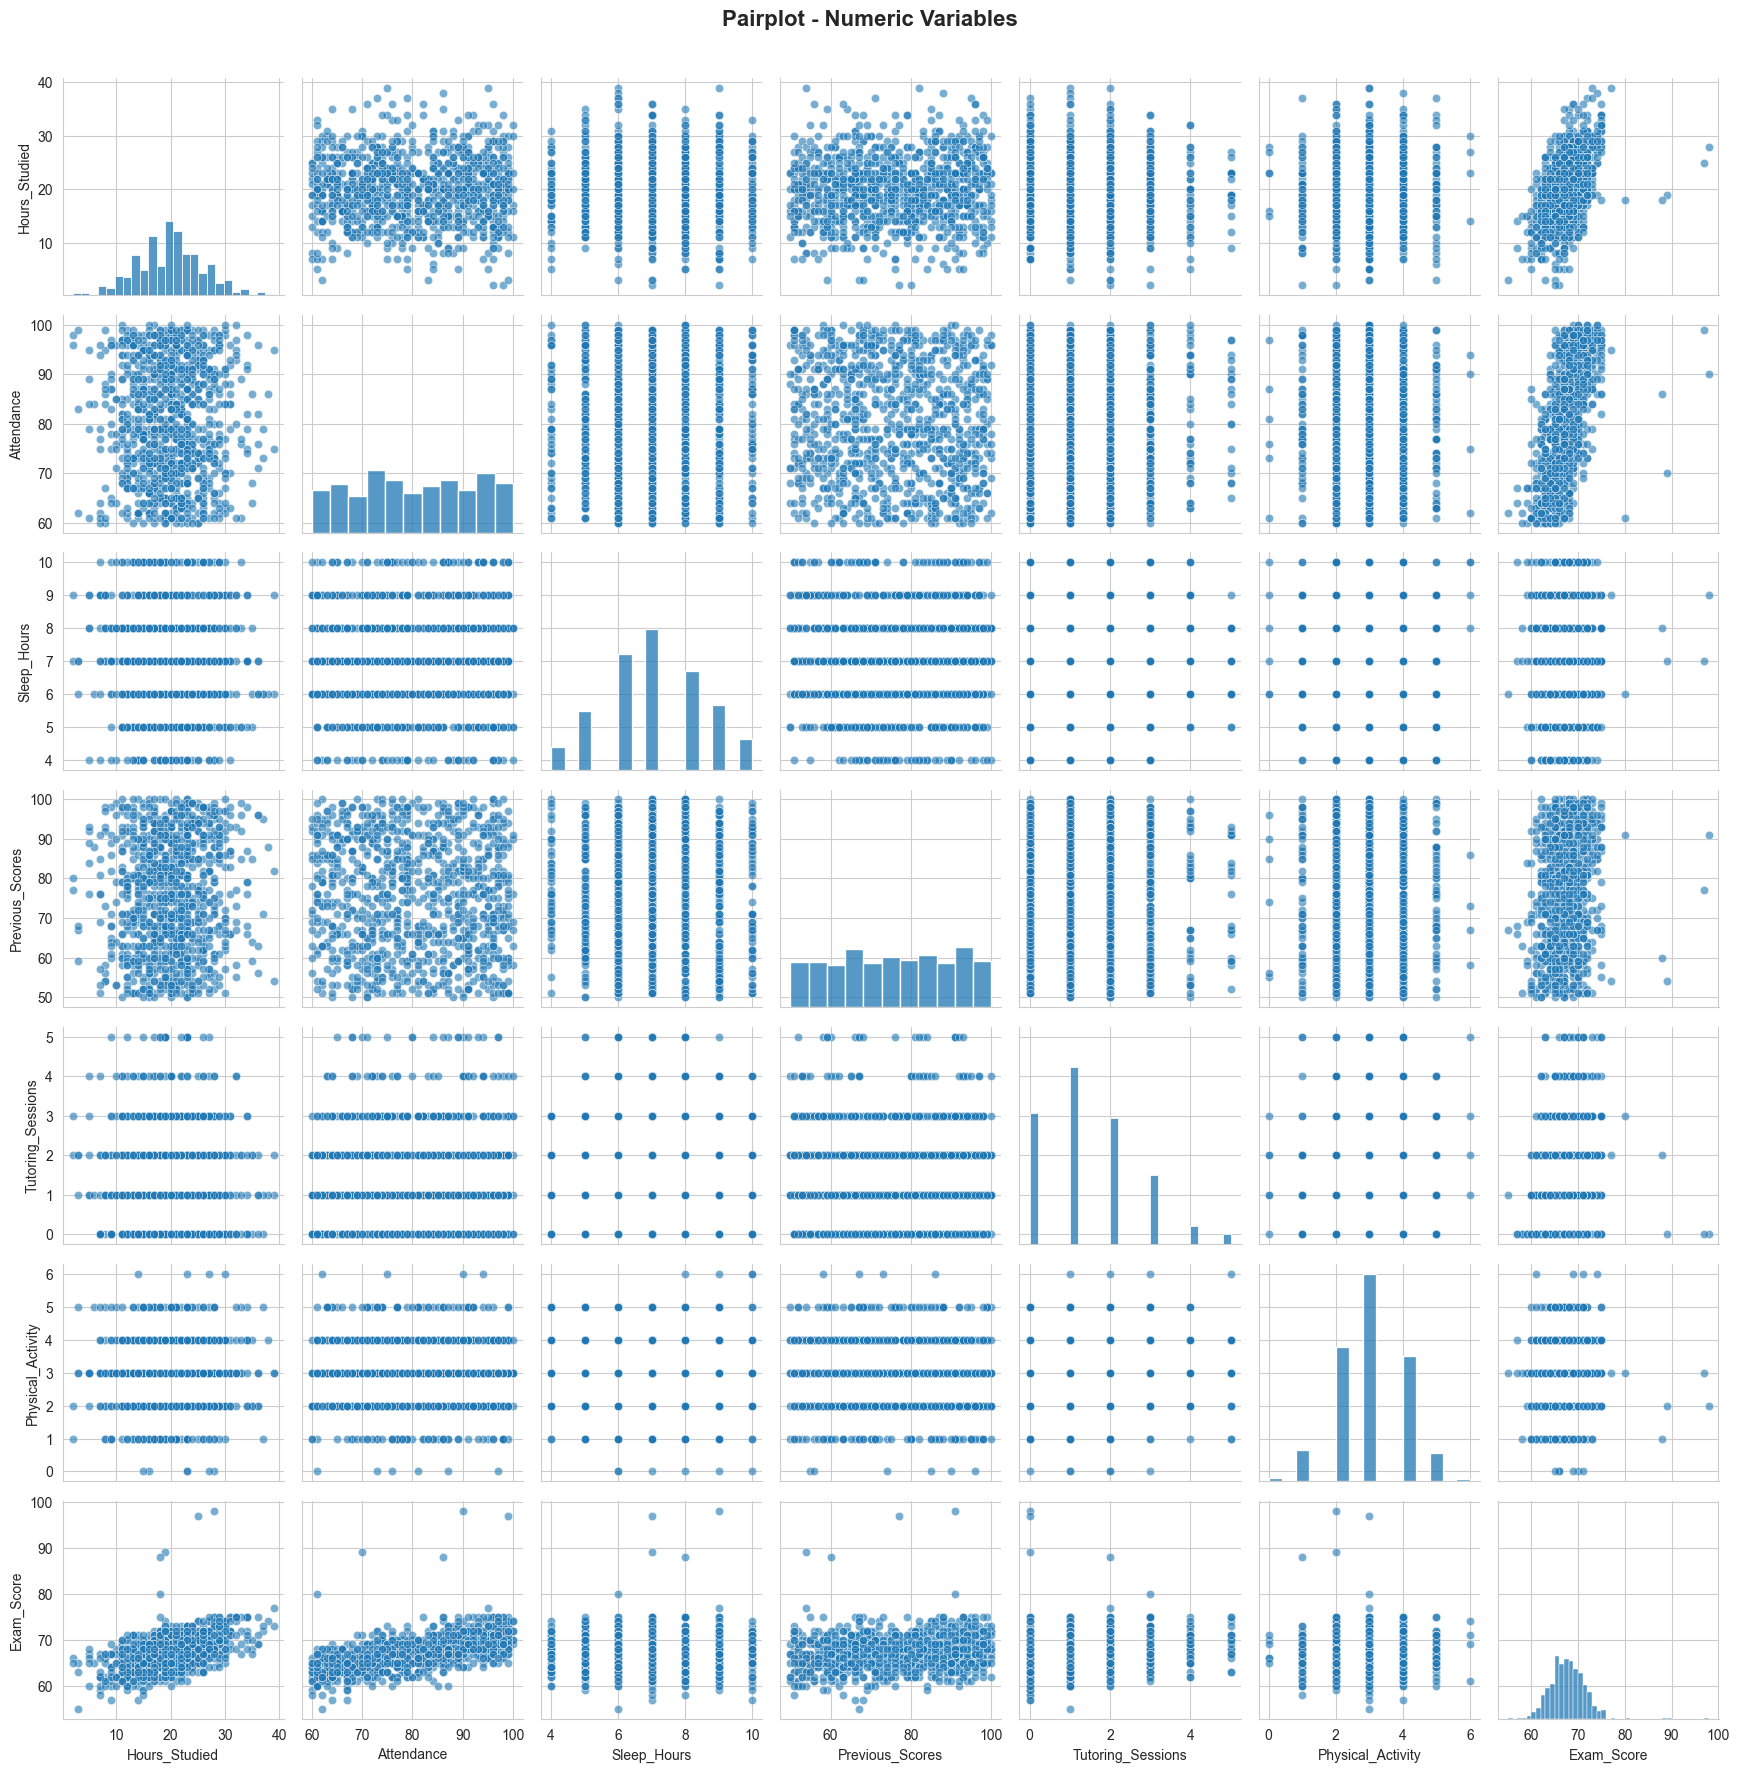

In [24]:
#Pairplot
sample_size = min(1000, len(df_cont))
df_sample = df_cont.sample(n=sample_size, random_state=42)

pairplot = sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot - Numeric Variables', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### Frequency histogram

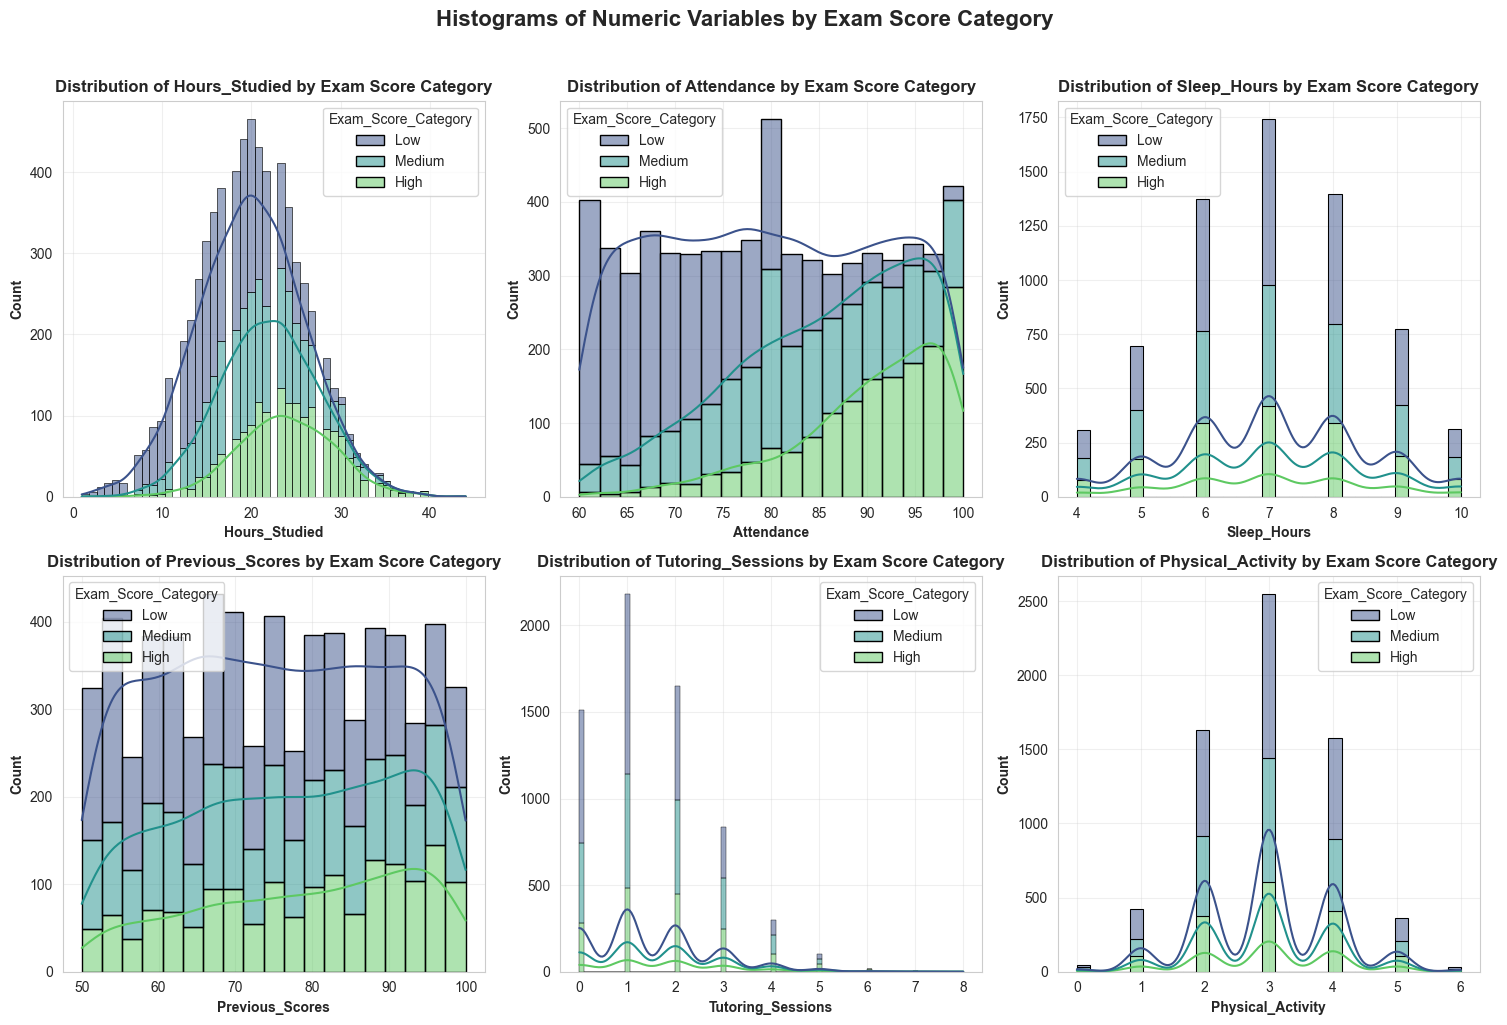

In [25]:
continuous_vars_for_plot = [col for col in continuous_vars if col != 'Exam_Score']
n_cols = 3
n_rows = (len(continuous_vars_for_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if len(continuous_vars_for_plot) > 1 else [axes]

for idx, col in enumerate(continuous_vars_for_plot):
    ax = axes[idx]
    sns.histplot(data=df_cont, x=col, hue='Exam_Score_Category', multiple='stack', palette='viridis', ax=ax, kde=True, edgecolor='black')
    ax.set_title(f'Distribution of {col} by Exam Score Category', fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')
    ax.grid(True, alpha=0.3)

for idx in range(len(continuous_vars_for_plot), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Histograms of Numeric Variables by Exam Score Category', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Target analysis

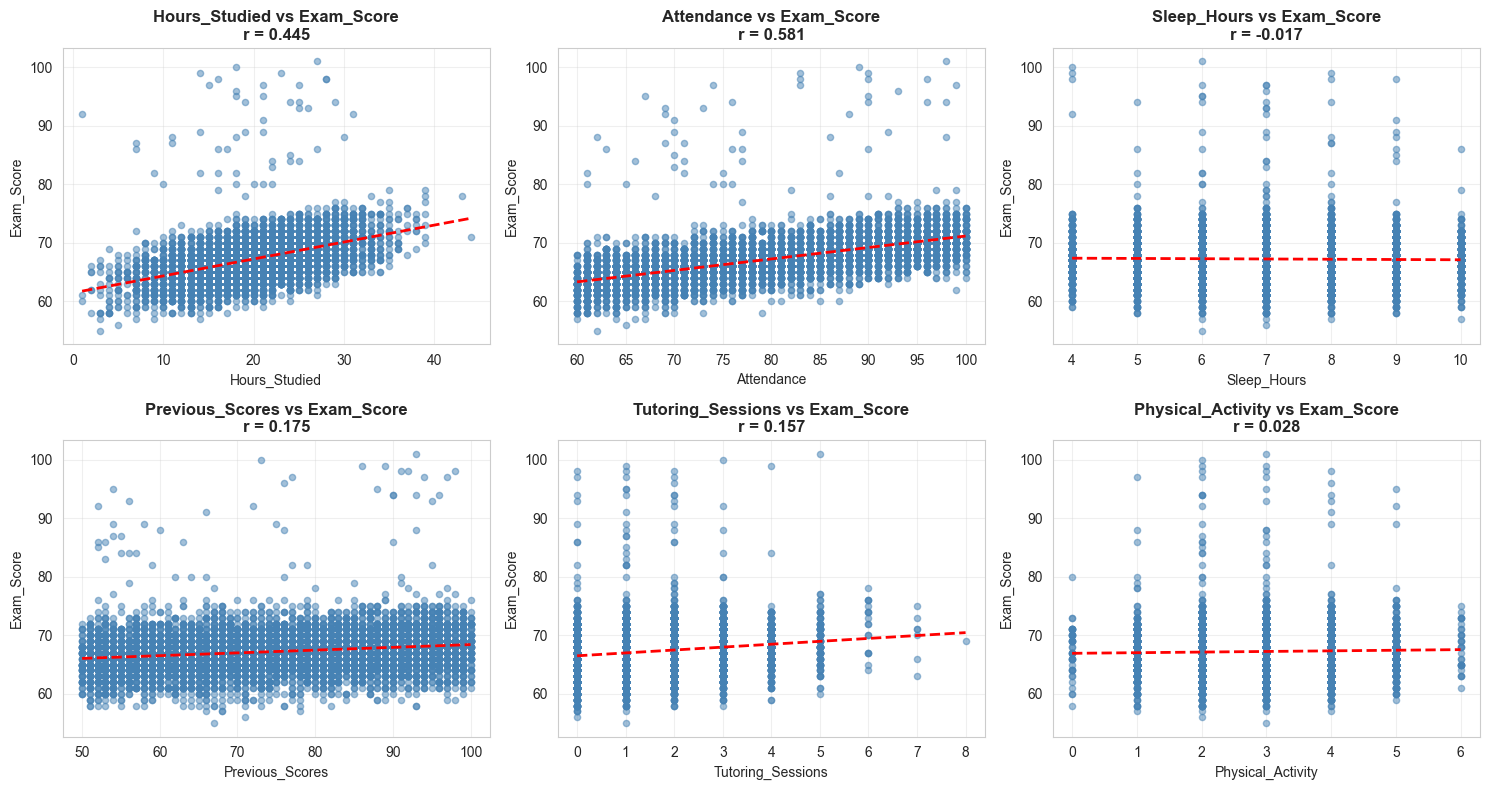

In [26]:
cont_non_target_vars = [col for col in continuous_vars if col != DATASET_TARGET]

n_plots = min(len(cont_non_target_vars), 9)
n_rows = (n_plots + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
axes = axes.flatten() if n_plots > 1 else [axes]

for idx, col in enumerate(cont_non_target_vars[:n_plots]):
    ax = axes[idx]
    ax.scatter(df[col], df[DATASET_TARGET], alpha=0.5, s=20, color='steelblue')

    # Add regression line
    z = np.polyfit(df[col].dropna(), df[DATASET_TARGET].dropna(), 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[col].min(), df[col].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2)

    # Calculate correlation
    corr = df[[col, DATASET_TARGET]].corr().iloc[0, 1]
    ax.set_title(f'{col} vs {DATASET_TARGET}\nr = {corr:.3f}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel(DATASET_TARGET)
    ax.grid(alpha=0.3)

for idx in range(n_plots, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

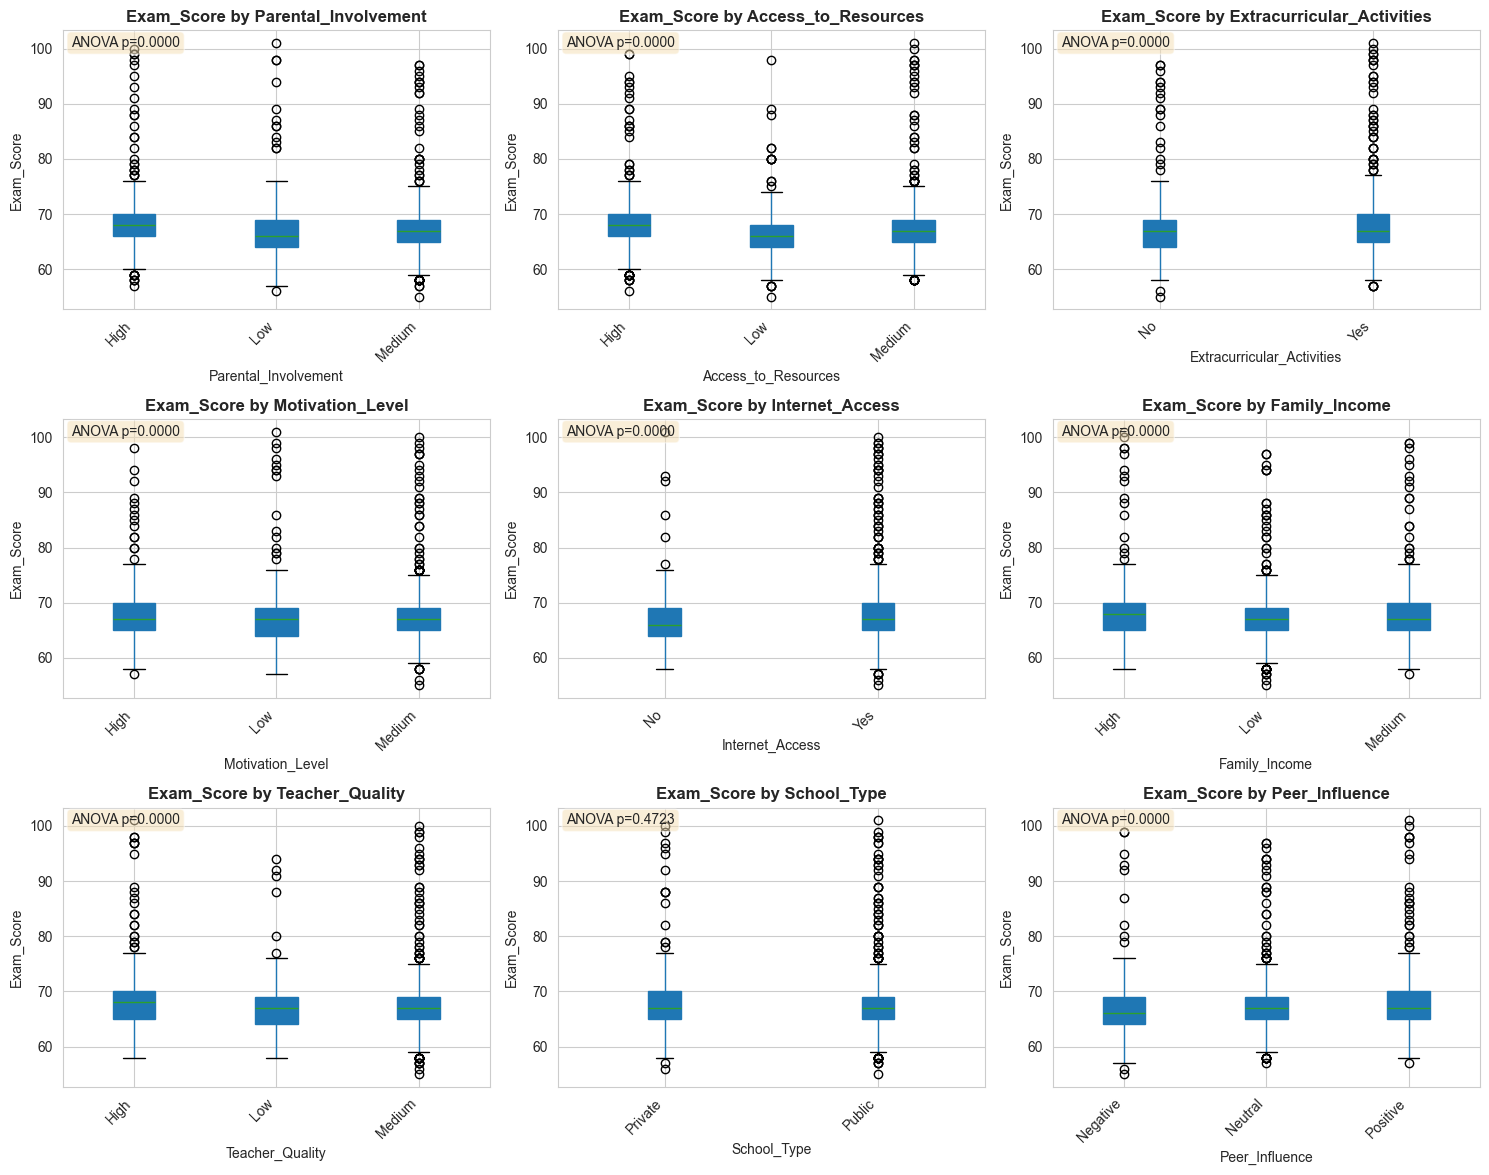

In [27]:
n_cat_plots = min(len(categorical_vars), 9)
n_rows = (n_cat_plots + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
axes = axes.flatten() if n_cat_plots > 1 else [axes]

for idx, col in enumerate(categorical_vars[:n_cat_plots]):
    ax = axes[idx]

    # Create box plot
    df.boxplot(column=DATASET_TARGET, by=col, ax=ax, patch_artist=True)
    ax.set_title(f'{DATASET_TARGET} by {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel(DATASET_TARGET)
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

    # ANOVA test
    groups = [group[DATASET_TARGET].dropna().values for name, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = stats.f_oneway(*groups)
        ax.text(0.02, 0.98, f'ANOVA p={p_val:.4f}',
                transform=ax.transAxes, va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for idx in range(n_cat_plots, len(axes)):
    axes[idx].axis('off')

plt.suptitle('')
plt.tight_layout()
plt.show()

# Data Preprocessing

## Data cleaning

In [28]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [29]:
df.loc[(df[DATASET_TARGET] > 100, DATASET_TARGET)] = 100

## Data Transformation

In [30]:
ordinal_encoder = OrdinalEncoder()
df[ordinal_vars] = ordinal_encoder.fit_transform(df[[cols for cols in categorical_vars if cols not in binary_vars]])

for col in binary_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-hot encoding
df = pd.get_dummies(df, columns=['School_Type', 'Peer_Influence'],
                    prefix=['School', 'Peer'], drop_first=False)
display(df)
print(len(df.columns))

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                   1.0                  0.0   
1                19          64                   1.0                  2.0   
2                24          98                   2.0                  2.0   
3                29          89                   1.0                  2.0   
4                19          92                   2.0                  2.0   
...             ...         ...                   ...                  ...   
6602             25          69                   0.0                  2.0   
6603             23          76                   0.0                  2.0   
6604             20          90                   2.0                  1.0   
6605             10          86                   0.0                  0.0   
6606             15          67                   2.0                  1.0   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            7               73   
1                              0            8               59   
2                              1            7               91   
3                              1            8               98   
4                              1            6               65   
...                          ...          ...              ...   
6602                           0            7               76   
6603                           0            8               81   
6604                           1            6               65   
6605                           1            6               91   
6606                           1            9               94   

      Motivation_Level  Internet_Access  Tutoring_Sessions  ...  \
0                  1.0                1                  0  ...   
1                  1.0                1                  2  ...   
2                  2.0                1                  2  ...   
3                  2.0                1                  1  ...   
4                  2.0                1                  3  ...   
...                ...              ...                ...  ...   
6602               2.0                1                  1  ...   
6603               2.0                1                  3  ...   
6604               1.0                1                  3  ...   
6605               0.0                1                  2  ...   
6606               2.0                1                  0  ...   

      Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
0                         0                       1.0                 2.0   
1                         0                       0.0                 1.0   
2                         0                       2.0                 2.0   
3                         0                       1.0                 1.0   
4                         0                       0.0                 2.0   
...                     ...                       ...                 ...   
6602                      0                       1.0                 2.0   
6603                      0                       1.0                 2.0   
6604                      0                       2.0                 2.0   
6605                      0                       1.0                 0.0   
6606                      0                       2.0                 2.0   

      Gender  Exam_Score  School_0  School_1  Peer_0.0  Peer_1.0  Peer_2.0  
0          1          67     False      True     False     False      True  
1          0          61     False      True      True     False     False  
2          1          74     False      True     False      True     False  
3          1          71     False      True      True     False     False  
4          0          70     False      True     False      True     False  
...      ...         ...       ...       ...       ...       ...       ...  
6602   

23


In [31]:
class DataTransformer:
    """
    Comprehensive data transformation toolkit for handling skewness and kurtosis
    """

    def __init__(self, df):
        self.df = df.copy()
        self.transformations = {}
        self.transformation_results = []

    def analyze_distributions(self, columns=None):
        """
        Analyze skewness and kurtosis for numerical columns
        """
        if columns is None:
            columns = self.df.select_dtypes(include=[np.number]).columns.tolist()

        results = []
        for col in columns:
            if self.df[col].isnull().all():
                continue

            data = self.df[col].dropna()
            results.append({
                'Column': col,
                'Skewness': data.skew(),
                'Kurtosis': data.kurtosis(),
                'Mean': data.mean(),
                'Median': data.median(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Has_Negative': (data < 0).any(),
                'Has_Zero': (data == 0).any()
            })

        return pd.DataFrame(results)

    def classify_skewness(self, skew_value):
        """Classify skewness level"""
        abs_skew = abs(skew_value)
        if abs_skew < 0.5:
            return "Normal"
        elif abs_skew < 1.0:
            return "Moderate"
        else:
            return "High"

    def log_transform(self, column, constant=1):
        """
        Log transformation: log(x + constant)
        Best for: Right-skewed data without zeros/negatives
        """
        data = self.df[column].copy()

        # Handle zeros and negatives
        min_val = data.min()
        if min_val <= 0:
            shift = abs(min_val) + constant
            transformed = np.log(data + shift)
            method_used = f"log(x + {shift:.2f})"
        else:
            transformed = np.log(data + constant)
            method_used = f"log(x + {constant})"

        return transformed, method_used

    def sqrt_transform(self, column):
        """
        Square root transformation: sqrt(x)
        Best for: Moderate right-skewed data
        """
        data = self.df[column].copy()

        # Handle negatives
        if data.min() < 0:
            shift = abs(data.min()) + 1
            transformed = np.sqrt(data + shift)
            method_used = f"sqrt(x + {shift:.2f})"
        else:
            transformed = np.sqrt(data)
            method_used = "sqrt(x)"

        return transformed, method_used

    def cube_root_transform(self, column):
        """
        Cube root transformation: x^(1/3)
        Best for: Works with negative values
        """
        data = self.df[column].copy()
        transformed = np.sign(data) * np.abs(data) ** (1/3)
        return transformed, "cbrt(x)"

    def reciprocal_transform(self, column):
        """
        Reciprocal transformation: 1/x
        Best for: Severe right-skewed data
        """
        data = self.df[column].copy()

        # Avoid division by zero
        if (data == 0).any():
            data = data + 1e-10

        transformed = 1 / data
        return transformed, "1/x"

    def boxcox_transform(self, column):
        """
        Box-Cox transformation: Automatically finds optimal lambda
        Best for: Right-skewed data (requires positive values)
        """
        data = self.df[column].dropna()

        if data.min() <= 0:
            shift = abs(data.min()) + 1
            data = data + shift
            method_used = f"boxcox(x + {shift:.2f})"
        else:
            method_used = "boxcox(x)"

        try:
            transformed_full = pd.Series(index=self.df.index, dtype=float)
            transformed, lambda_param = boxcox(data)
            transformed_full[data.index] = transformed
            return transformed_full, f"{method_used}, λ={lambda_param:.3f}"
        except:
            return self.df[column], "boxcox_failed"

    def yeojohnson_transform(self, column):
        """
        Yeo-Johnson transformation: Like Box-Cox but handles negatives and zeros
        Best for: Any distribution
        """
        data = self.df[column].dropna()

        try:
            transformed_full = pd.Series(index=self.df.index, dtype=float)
            transformed, lambda_param = yeojohnson(data)
            transformed_full[data.index] = transformed
            return transformed_full, f"yeo-johnson, λ={lambda_param:.3f}"
        except:
            return self.df[column], "yeojohnson_failed"

    def quantile_transform(self, column, n_quantiles=1000):
        """
        Quantile transformation: Maps to uniform or normal distribution
        Best for: Non-linear transformations, robust to outliers
        """
        data = self.df[column].values.reshape(-1, 1)

        qt = QuantileTransformer(n_quantiles=n_quantiles,
                                 output_distribution='normal',
                                 random_state=42)
        transformed = qt.fit_transform(data).flatten()

        return pd.Series(transformed, index=self.df.index), "quantile_normal"

    def winsorize(self, column, limits=(0.05, 0.05)):
        """
        Winsorization: Caps extreme values at percentiles
        Best for: Preserving distribution shape while handling outliers
        """
        from scipy.stats.mstats import winsorize
        data = self.df[column].values
        transformed = winsorize(data, limits=limits)
        return pd.Series(transformed, index=self.df.index), f"winsorize({limits[0]}, {limits[1]})"

    def test_transformations(self, column, methods='auto'):
        """
        Test multiple transformations and compare results

        Parameters:
        -----------
        column : str
            Column name to transform
        methods : list or 'auto'
            List of methods to test or 'auto' for automatic selection
        """
        if methods == 'auto':
            # Auto-select based on data characteristics
            data = self.df[column].dropna()
            has_negative = (data < 0).any()
            has_zero = (data == 0).any()

            if has_negative:
                methods = ['cube_root', 'yeojohnson', 'quantile', 'winsorize']
            elif has_zero:
                methods = ['log', 'sqrt', 'yeojohnson', 'quantile', 'winsorize']
            else:
                methods = ['log', 'sqrt', 'boxcox', 'yeojohnson', 'quantile', 'winsorize']

        original_data = self.df[column].dropna()
        original_skew = original_data.skew()
        original_kurt = original_data.kurtosis()

        results = [{
            'Method': 'Original',
            'Skewness': original_skew,
            'Kurtosis': original_kurt,
            'Abs_Skew': abs(original_skew),
            'Transformation': None
        }]

        transformations = {}

        for method in methods:
            try:
                if method == 'log':
                    transformed, method_name = self.log_transform(column)
                elif method == 'sqrt':
                    transformed, method_name = self.sqrt_transform(column)
                elif method == 'cube_root':
                    transformed, method_name = self.cube_root_transform(column)
                elif method == 'reciprocal':
                    transformed, method_name = self.reciprocal_transform(column)
                elif method == 'boxcox':
                    transformed, method_name = self.boxcox_transform(column)
                elif method == 'yeojohnson':
                    transformed, method_name = self.yeojohnson_transform(column)
                elif method == 'quantile':
                    transformed, method_name = self.quantile_transform(column)
                elif method == 'winsorize':
                    transformed, method_name = self.winsorize(column)
                else:
                    continue

                transformed_clean = transformed.dropna()

                if len(transformed_clean) > 0:
                    skew = transformed_clean.skew()
                    kurt = transformed_clean.kurtosis()

                    results.append({
                        'Method': method_name,
                        'Skewness': skew,
                        'Kurtosis': kurt,
                        'Abs_Skew': abs(skew),
                        'Transformation': method
                    })

                    transformations[method] = transformed

            except Exception as e:
                print(f"Warning: {method} failed for {column}: {str(e)}")
                continue

        results_df = pd.DataFrame(results).sort_values('Abs_Skew')

        return results_df, transformations

    def visualize_transformations(self, column, transformations, results_df):
        """
        Visualize original and transformed distributions
        """
        n_transforms = len(transformations) + 1  # +1 for original
        n_cols = 3
        n_rows = (n_transforms + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
        axes = axes.flatten() if n_transforms > 1 else [axes]

        # Plot original
        ax = axes[0]
        original_data = self.df[column].dropna()
        ax.hist(original_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        original_data.plot(kind='kde', ax=ax, color='red', linewidth=2)
        ax.set_title(f'Original\nSkew: {original_data.skew():.3f}, Kurt: {original_data.kurtosis():.3f}',
                    fontweight='bold', fontsize=11)
        ax.set_xlabel(column)
        ax.grid(alpha=0.3)

        # Plot transformations
        for idx, (method, transformed) in enumerate(transformations.items(), 1):
            ax = axes[idx]
            transformed_clean = transformed.dropna()

            ax.hist(transformed_clean, bins=30, alpha=0.7, color='lightgreen',
                   edgecolor='black', density=True)
            transformed_clean.plot(kind='kde', ax=ax, color='darkgreen', linewidth=2)

            method_name = results_df[results_df['Transformation'] == method]['Method'].values[0]
            skew = transformed_clean.skew()
            kurt = transformed_clean.kurtosis()

            ax.set_title(f'{method_name}\nSkew: {skew:.3f}, Kurt: {kurt:.3f}',
                        fontweight='bold', fontsize=11)
            ax.set_xlabel(f'{column} (transformed)')
            ax.grid(alpha=0.3)

        # Hide empty subplots
        for idx in range(n_transforms, len(axes)):
            axes[idx].axis('off')

        plt.suptitle(f'Transformation Comparison: {column}',
                    fontsize=14, fontweight='bold', y=1.00)
        plt.tight_layout()

        return fig

    def auto_transform_dataset(self, columns=None, skew_threshold=0.5,
                              save_results=True):
        """
        Automatically transform all skewed columns in the dataset

        Parameters:
        -----------
        columns : list or None
            Columns to transform (None = all numerical)
        skew_threshold : float
            Absolute skewness threshold to trigger transformation
        save_results : bool
            Whether to save transformation plots
        """
        if columns is None:
            columns = self.df.select_dtypes(include=[np.number]).columns.tolist()

        transformed_df = self.df.copy()
        transformation_summary = []

        for col in columns:
            original_skew = abs(self.df[col].skew())

            if original_skew < skew_threshold:
                print(f"\n✓ {col}: Skewness {original_skew:.3f} < {skew_threshold} - No transformation needed")
                transformation_summary.append({
                    'Column': col,
                    'Original_Skew': original_skew,
                    'Transformed_Skew': original_skew,
                    'Method': 'None',
                    'Improvement': 0
                })
                continue

            print(f"\n{'='*60}")
            print(f"Transforming: {col} (Skewness: {original_skew:.3f})")
            print(f"{'='*60}")

            # Test transformations
            results_df, transformations = self.test_transformations(col)
            print(results_df.to_string(index=False))

            # Remove invalid rows
            valid_results = results_df[results_df['Transformation'].notna()]

            # If no valid transformation exists, keep original
            if valid_results.empty:
                transformed_df[col] = self.df[col]
            continue

            # Pick the transformation with minimum absolute skewness
            best_method = valid_results.iloc[valid_results['Skewness'].abs().argmin()]
            best_transform = transformations[best_method['Transformation']]
            transformed_df[col] = best_transform

            improvement = ((original_skew - abs(best_method['Skewness'])) / original_skew * 100)

            transformation_summary.append({
                'Column': col,
                'Original_Skew': original_skew,
                'Transformed_Skew': abs(best_method['Skewness']),
                'Method': best_method['Method'],
                'Improvement': improvement
            })

            print(f"\n✓ Best method: {best_method['Method']}")
            print(f"  Skewness reduced from {original_skew:.3f} to {abs(best_method['Skewness']):.3f}")
            print(f"  Improvement: {improvement:.1f}%")

            # Visualize
            if save_results:
                fig = self.visualize_transformations(col, transformations, results_df)
                filename = f"transform_{col.replace(' ', '_')}.png"
                plt.savefig(filename, dpi=300, bbox_inches='tight')
                print(f"  Saved visualization: {filename}")
                plt.close()

        summary_df = pd.DataFrame(transformation_summary)

        print("\n" + "="*80)
        print("TRANSFORMATION SUMMARY")
        print("="*80)
        print(summary_df.to_string(index=False))

        return transformed_df, summary_df


1. DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------
                    Column  Skewness  Kurtosis      Mean  Median       Std  Min   Max  Has_Negative  Has_Zero
             Hours_Studied  0.016225  0.006554 19.977109    20.0  5.985460  1.0  44.0         False     False
                Attendance  0.005663 -1.195814 80.020853    80.0 11.550723 60.0 100.0         False     False
      Parental_Involvement -0.443654 -1.520062  1.221856     2.0  0.865149  0.0   2.0         False      True
       Access_to_Resources -0.407794 -1.560008  1.204453     2.0  0.870959  0.0   2.0         False      True
Extracurricular_Activities -0.395165 -1.844423  0.596896     1.0  0.490560  0.0   1.0         False      True
               Sleep_Hours -0.026814 -0.503784  7.034964     7.0  1.468033  4.0  10.0         False     False
           Previous_Scores -0.001362 -1.192197 75.066165    75.0 14.400389 50.0 100.0         False     False
          Mot

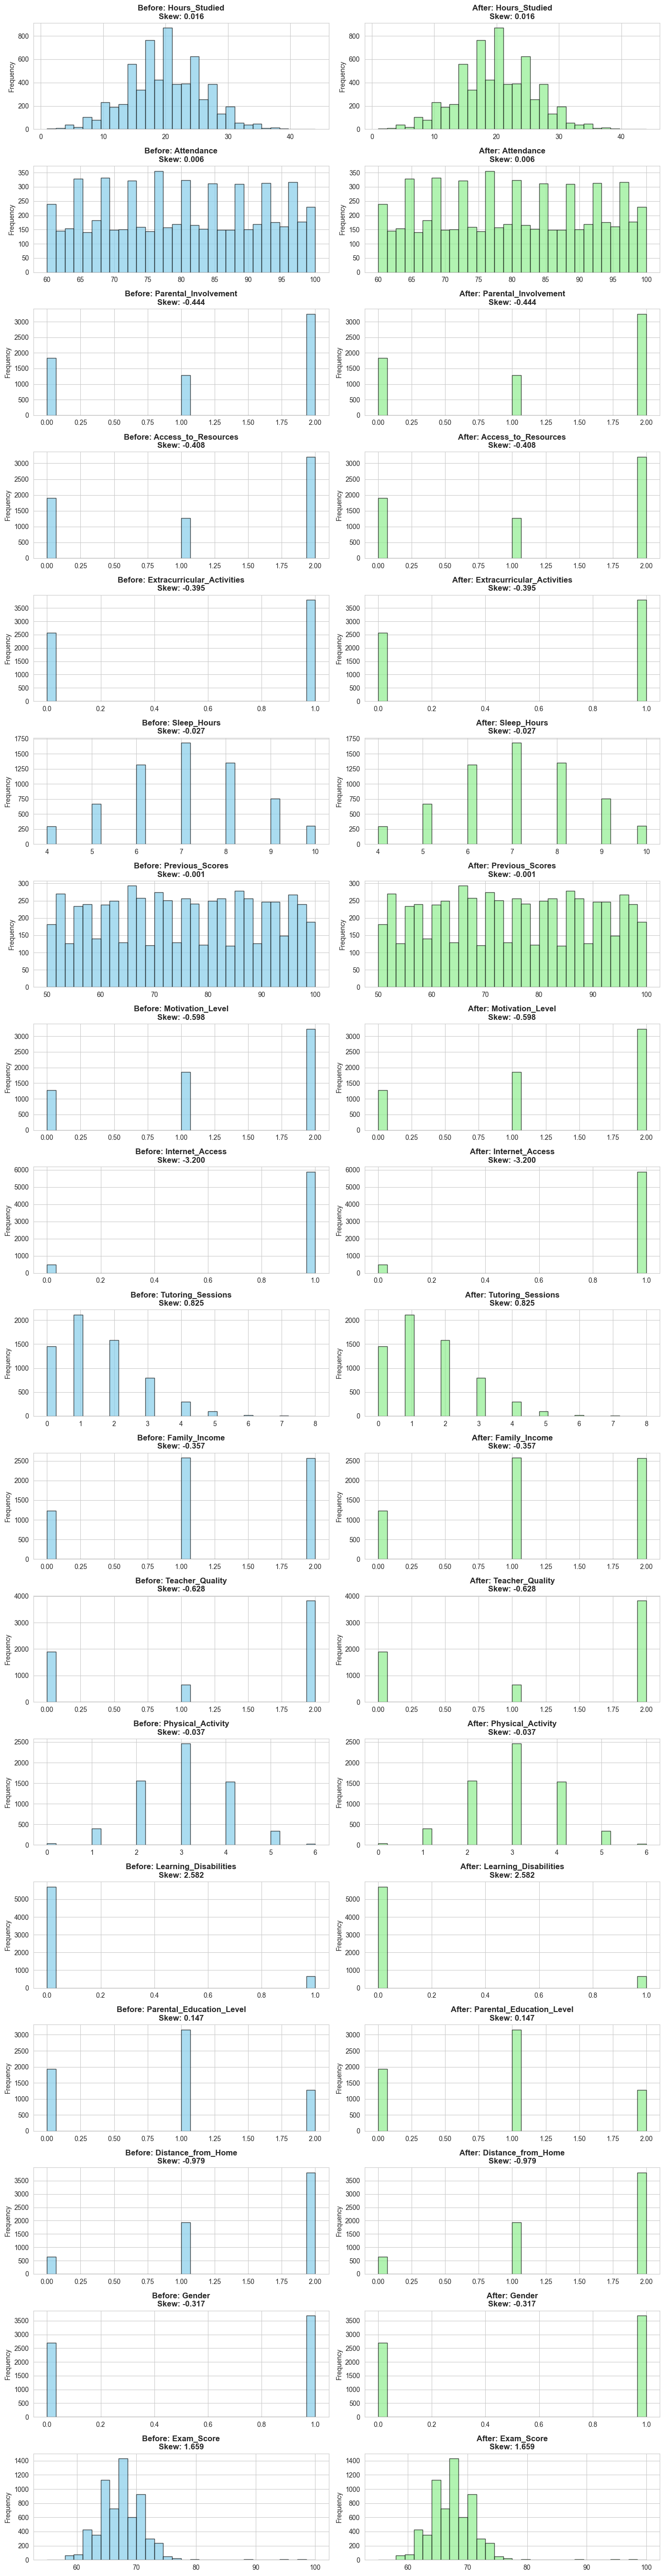

In [32]:
transformer = DataTransformer(df)

# Analyze distributions
print("\n1. DISTRIBUTION ANALYSIS")
print("-"*80)
dist_analysis = transformer.analyze_distributions()
print(dist_analysis.to_string(index=False))

# Auto-transform all skewed columns
print("\n2. AUTOMATIC TRANSFORMATION")
print("-"*80)
transformed_df, summary = transformer.auto_transform_dataset(
    skew_threshold=0.5,
    save_results=True
)

# Compare before and after
print("\n3. BEFORE vs AFTER COMPARISON")
print("-"*80)

continous_vars = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(len(continous_vars), 2, figsize=(14, len(continous_vars) * 3))

for idx, col in enumerate(continous_vars):
    # Before
    ax = axes[idx, 0] if len(continous_vars) > 1 else axes[0]
    df[col].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Before: {col}\nSkew: {df[col].skew():.3f}', fontweight='bold')
    ax.set_ylabel('Frequency')

    # After
    ax = axes[idx, 1] if len(continous_vars) > 1 else axes[1]
    transformed_df[col].hist(bins=30, alpha=0.7, color='lightgreen', edgecolor='black', ax=ax)
    ax.set_title(f'After: {col}\nSkew: {transformed_df[col].skew():.3f}', fontweight='bold')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Model implementation

In [33]:
X, y = df.drop(columns=[DATASET_TARGET]), df[DATASET_TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [35]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [36]:
model_names = []
r2_scores_test = []
r2_scores_train = []
rmse_scores_test = []
rmse_scores_train = []
mae_scores_test = []
mae_scores_train = []

for name, model in models.items():
    # Train model
        # For models that support partial_fit or warm_start, show incremental progress
    if name in ["XGBRegressor", "CatBoosting Regressor", "AdaBoost Regressor"]:
        # These models train iteratively, we can monitor their progress
        if name == "XGBRegressor":
            model_verbose = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
            eval_set = [(X_train, y_train), (X_test, y_test)]
            model_verbose.fit(X_train, y_train, eval_set=eval_set, verbose=True)
            model = model_verbose

        elif name == "CatBoosting Regressor":
            model_verbose = CatBoostRegressor(iterations=100, verbose=20, random_state=42)  # Print every 20 iterations
            model_verbose.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True)
            model = model_verbose

        elif name == "AdaBoost Regressor":
            # AdaBoost - show progress with manual iteration
            n_estimators = 50
            for i in [10, 20, 30, 40, 50]:
                model_temp = AdaBoostRegressor(n_estimators=i, random_state=42)
                model_temp.fit(X_train, y_train)

                train_pred = model_temp.predict(X_train)
                test_pred = model_temp.predict(X_test)

                train_r2 = evaluate_model(y_train, train_pred)[2]
                test_r2 = evaluate_model(y_test, test_pred)[2]

                print(f"   Estimators: {i:3d} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

            model.fit(X_train, y_train)

        elif name == "Random Forest Regressor":
            # Random Forest - show progress with manual iteration
            for i in [10, 25, 50, 75, 100]:
                model_temp = RandomForestRegressor(n_estimators=i, random_state=42)
                model_temp.fit(X_train, y_train)

                train_pred = model_temp.predict(X_train)
                test_pred = model_temp.predict(X_test)

                train_r2 = evaluate_model(y_train, train_pred)[2]
                test_r2 = evaluate_model(y_test, test_pred)[2]

                print(f"   Trees: {i:3d} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

            model.fit(X_train, y_train)
    else:
        # For models without iterative training, use learning curves
        print(f"   Training on incremental data sizes...")
        train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]

        for size in train_sizes:
            n_samples = int(len(X_train) * size)
            X_train_partial = X_train[:n_samples]
            y_train_partial = y_train[:n_samples]

            model_temp = type(model)(**model.get_params())
            model_temp.fit(X_train_partial, y_train_partial)

            train_pred = model_temp.predict(X_train_partial)
            test_pred = model_temp.predict(X_test)

            train_r2 = evaluate_model(y_train_partial, train_pred)[2]
            test_r2 = evaluate_model(y_test, test_pred)[2]

            print(f"   Data size: {size*100:5.0f}% ({n_samples:4d} samples) | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

        # Final fit on full data
        model.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
     # Evaluate Training dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # Evaluate Test dataset
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Calculate difference to check overfitting
    r2_diff = model_train_r2 - model_test_r2

    # Determine overfitting status
    if r2_diff > 0.1:
        status = "Overfitting"
    elif r2_diff < -0.05:
        status = "Underfitting"
    else:
        status = "Good Fit"

    # Store results
    model_names.append(name)
    mae_scores_test.append(model_test_mae)
    mae_scores_train.append(model_train_mae)
    rmse_scores_test.append(model_test_rmse)
    rmse_scores_train.append(model_train_rmse)
    r2_scores_test.append(model_test_r2)
    r2_scores_train.append(model_train_r2)

# Create a DataFrame for easy viewing
model_performance_df = pd.DataFrame({
    'Model': model_names,
    'R2 (Train)': r2_scores_train,
    'R2 (Test)': r2_scores_test,
    'R2 Diff': [train - test for train, test in zip(r2_scores_train, r2_scores_test)],
    'RMSE (Train)': rmse_scores_train,
    'RMSE (Test)': rmse_scores_test,
    'MAE (Train)': mae_scores_train,
    'MAE (Test)': mae_scores_test
})

# Display the DataFrame, sorted by R2 Score for better comparison
display(model_performance_df.sort_values(by='R2 (Test)', ascending=False))

   Training on incremental data sizes...
   Data size:    20% (1020 samples) | Train R²: 0.5979 | Test R²: 0.6599
   Data size:    40% (2040 samples) | Train R²: 0.6478 | Test R²: 0.6629
   Data size:    60% (3061 samples) | Train R²: 0.6482 | Test R²: 0.6637
   Data size:    80% (4081 samples) | Train R²: 0.6318 | Test R²: 0.6644
   Data size:   100% (5102 samples) | Train R²: 0.6422 | Test R²: 0.6642
   Training on incremental data sizes...
   Data size:    20% (1020 samples) | Train R²: 0.5083 | Test R²: 0.5756
   Data size:    40% (2040 samples) | Train R²: 0.5564 | Test R²: 0.5792
   Data size:    60% (3061 samples) | Train R²: 0.5586 | Test R²: 0.5790
   Data size:    80% (4081 samples) | Train R²: 0.5504 | Test R²: 0.5808
   Data size:   100% (5102 samples) | Train R²: 0.5618 | Test R²: 0.5800
   Training on incremental data sizes...
   Data size:    20% (1020 samples) | Train R²: 0.5979 | Test R²: 0.6600
   Data size:    40% (2040 samples) | Train R²: 0.6478 | Test R²: 0.6629
 

Model  R2 (Train)  R2 (Test)   R2 Diff  RMSE (Train)  \
6    CatBoosting Regressor    0.809374   0.715021  0.094352      1.705027   
5             XGBRegressor    0.914489   0.676461  0.238028      1.141958   
0        Linear Regression    0.642163   0.664250 -0.022087      2.336053   
2                    Ridge    0.642163   0.664243 -0.022080      2.336053   
4  Random Forest Regressor    0.946533   0.628142  0.318392      0.902986   
1                    Lasso    0.561768   0.579969 -0.018201      2.585186   
3    K-Neighbors Regressor    0.674058   0.522185  0.151873      2.229512   
7       AdaBoost Regressor   -1.572769  -1.715440  0.142671      6.263837   

   RMSE (Test)  MAE (Train)  MAE (Test)  
6     2.104371     0.569512    0.673993  
5     2.242225     0.474187    0.862194  
0     2.284147     1.068574    1.064038  
2     2.284171     1.068602    1.064075  
4     2.403836     0.452219    1.178699  
1     2.554799     1.440801    1.435839  
3     2.724871     1.249157    1.550940  
7     6.495853     5.720821    5.884495

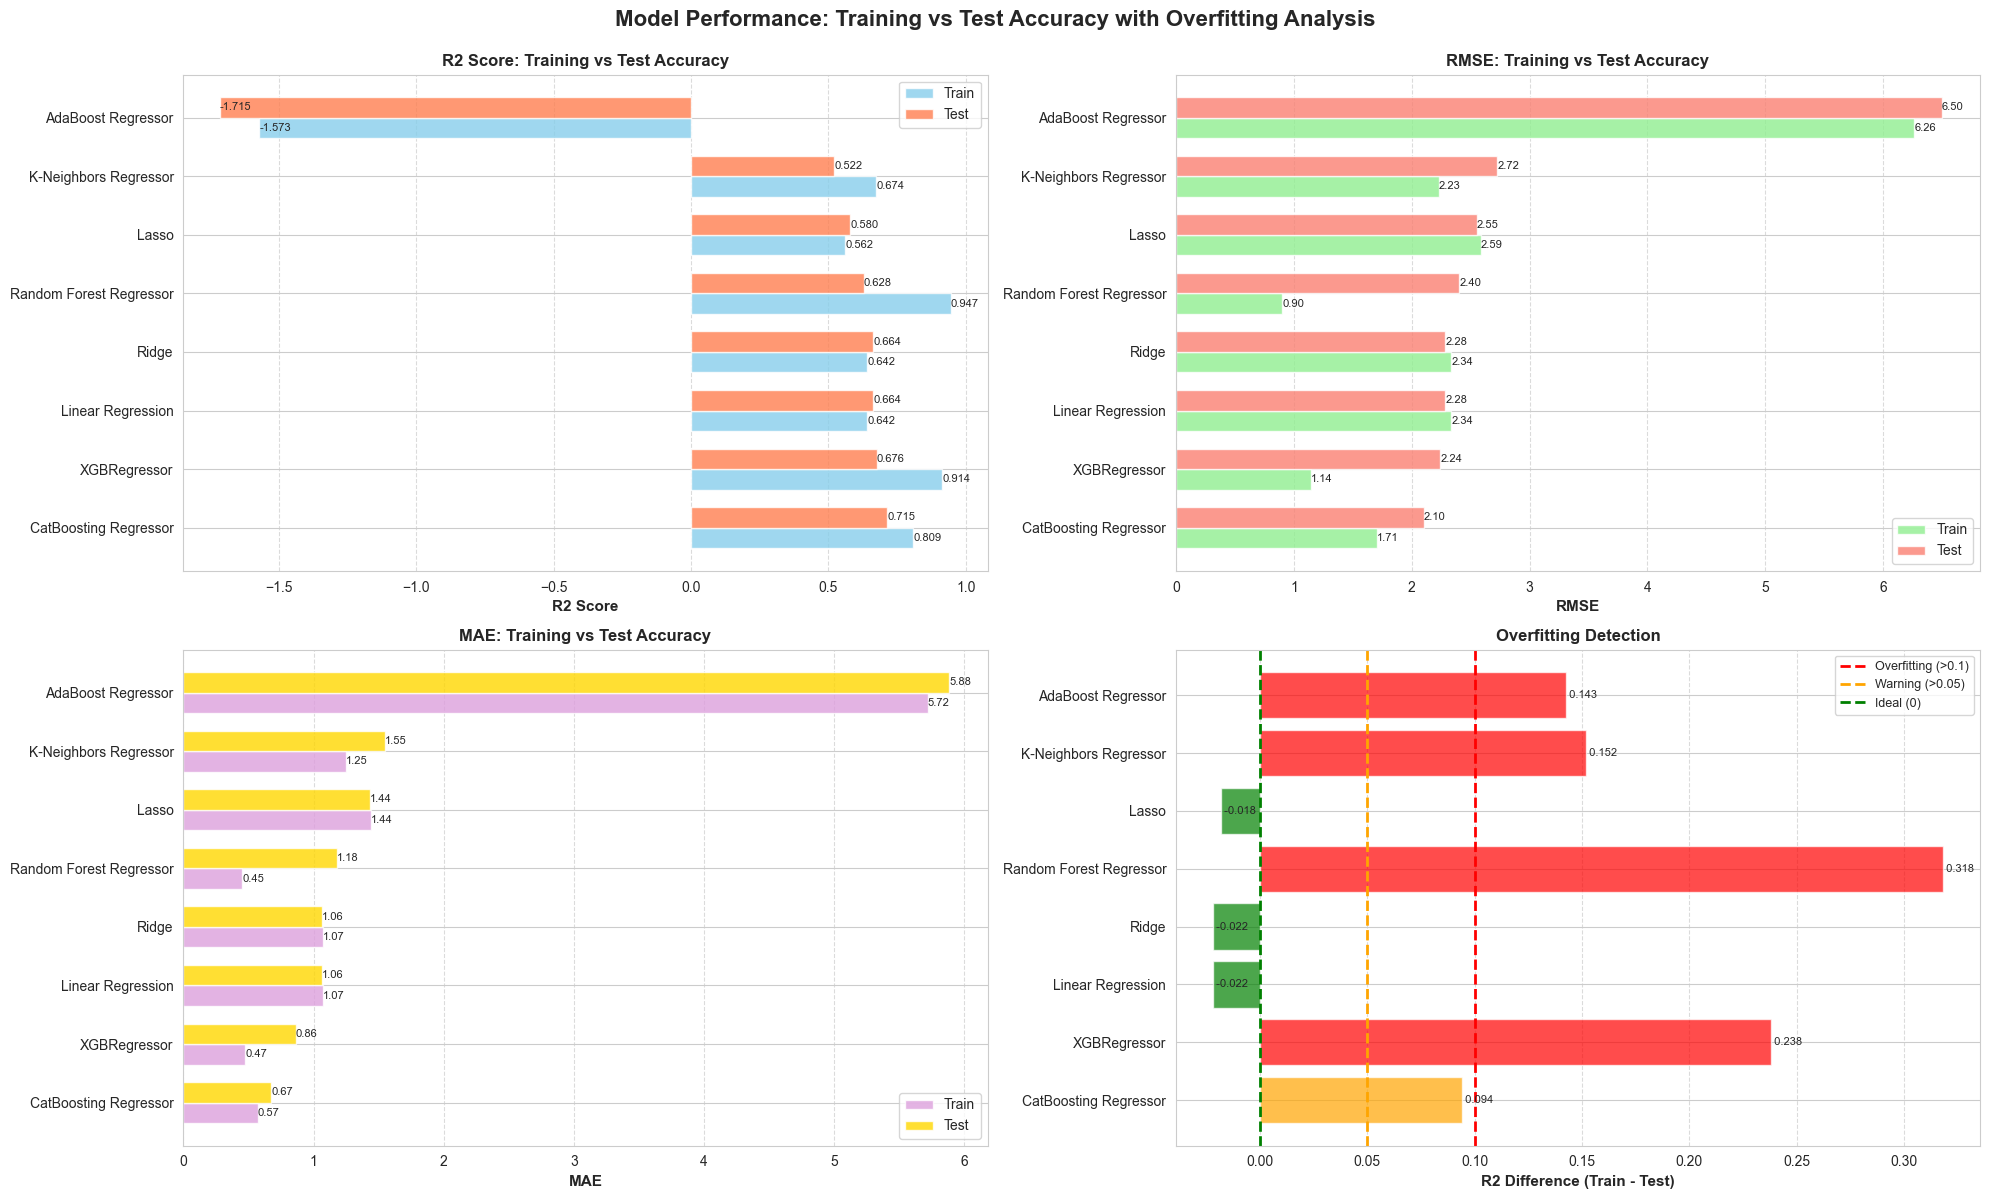

In [37]:

# Enhanced visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: R2 Score Comparison (Train vs Test)
df_sorted = model_performance_df.sort_values(by='R2 (Test)', ascending=False)
x = np.arange(len(df_sorted))
width = 0.35

axes[0, 0].barh(x - width/2, df_sorted['R2 (Train)'], width, label='Train', alpha=0.8, color='skyblue')
axes[0, 0].barh(x + width/2, df_sorted['R2 (Test)'], width, label='Test', alpha=0.8, color='coral')
axes[0, 0].set_yticks(x)
axes[0, 0].set_yticklabels(df_sorted['Model'])
axes[0, 0].set_xlabel('R2 Score', fontweight='bold', fontsize=11)
axes[0, 0].set_title('R2 Score: Training vs Test Accuracy', fontweight='bold', fontsize=12)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(df_sorted['R2 (Train)'], df_sorted['R2 (Test)'])):
    axes[0, 0].text(train_val, i - width/2, f'{train_val:.3f}', va='center', ha='left', fontsize=8)
    axes[0, 0].text(test_val, i + width/2, f'{test_val:.3f}', va='center', ha='left', fontsize=8)

# Plot 2: RMSE Comparison (Train vs Test)
df_sorted_rmse = model_performance_df.sort_values(by='RMSE (Test)', ascending=True)
x_rmse = np.arange(len(df_sorted_rmse))

axes[0, 1].barh(x_rmse - width/2, df_sorted_rmse['RMSE (Train)'], width, label='Train', alpha=0.8, color='lightgreen')
axes[0, 1].barh(x_rmse + width/2, df_sorted_rmse['RMSE (Test)'], width, label='Test', alpha=0.8, color='salmon')
axes[0, 1].set_yticks(x_rmse)
axes[0, 1].set_yticklabels(df_sorted_rmse['Model'])
axes[0, 1].set_xlabel('RMSE', fontweight='bold', fontsize=11)
axes[0, 1].set_title('RMSE: Training vs Test Accuracy', fontweight='bold', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(df_sorted_rmse['RMSE (Train)'], df_sorted_rmse['RMSE (Test)'])):
    axes[0, 1].text(train_val, i - width/2, f'{train_val:.2f}', va='center', ha='left', fontsize=8)
    axes[0, 1].text(test_val, i + width/2, f'{test_val:.2f}', va='center', ha='left', fontsize=8)

# Plot 3: MAE Comparison (Train vs Test)
df_sorted_mae = model_performance_df.sort_values(by='MAE (Test)', ascending=True)
x_mae = np.arange(len(df_sorted_mae))

axes[1, 0].barh(x_mae - width/2, df_sorted_mae['MAE (Train)'], width, label='Train', alpha=0.8, color='plum')
axes[1, 0].barh(x_mae + width/2, df_sorted_mae['MAE (Test)'], width, label='Test', alpha=0.8, color='gold')
axes[1, 0].set_yticks(x_mae)
axes[1, 0].set_yticklabels(df_sorted_mae['Model'])
axes[1, 0].set_xlabel('MAE', fontweight='bold', fontsize=11)
axes[1, 0].set_title('MAE: Training vs Test Accuracy', fontweight='bold', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(df_sorted_mae['MAE (Train)'], df_sorted_mae['MAE (Test)'])):
    axes[1, 0].text(train_val, i - width/2, f'{train_val:.2f}', va='center', ha='left', fontsize=8)
    axes[1, 0].text(test_val, i + width/2, f'{test_val:.2f}', va='center', ha='left', fontsize=8)

# Plot 4: R2 Score Difference (Overfitting Indicator)
colors = ['red' if diff > 0.1 else 'orange' if diff > 0.05 else 'green' for diff in df_sorted['R2 Diff']]
axes[1, 1].barh(df_sorted['Model'], df_sorted['R2 Diff'], color=colors, alpha=0.7)
axes[1, 1].axvline(x=0.1, color='red', linestyle='--', label='Overfitting (>0.1)', linewidth=2)
axes[1, 1].axvline(x=0.05, color='orange', linestyle='--', label='Warning (>0.05)', linewidth=2)
axes[1, 1].axvline(x=0, color='green', linestyle='--', label='Ideal (0)', linewidth=2)
axes[1, 1].set_xlabel('R2 Difference (Train - Test)', fontweight='bold', fontsize=11)
axes[1, 1].set_title('Overfitting Detection', fontweight='bold', fontsize=12)
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels
for i, (model, diff) in enumerate(zip(df_sorted['Model'], df_sorted['R2 Diff'])):
    axes[1, 1].text(diff, i, f' {diff:.3f}', va='center', fontsize=8)

plt.suptitle('Model Performance: Training vs Test Accuracy with Overfitting Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()